## Problem Statement

### How would you predict the price of a mobile device?

    Two types of Target Varible for Price
        Price Range
        Price (Continuous)

### Here in this assignment lets move ahead with Predicting Price Range 

In [150]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import boxcox, anderson
from scipy.stats import yeojohnson


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import shap
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings ("ignore")

## Data Collection
 * Source: Look for publicly available datasets from Kaggle, UCI ML Repository, or other sources containing mobile device specifications and prices.
 * Features: Key features can include RAM, storage, processor, screen size, battery, camera specs, brand, and OS.


In [ ]:
## price data - Regression
df = pd.read_csv ("/home/jovyan/data/price_range/train.csv")

In [25]:
df.head()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,0,0,0,0,0,1,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,1,1,1,1,1,0,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,1,1,1,1,1,0,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,0,1,0,0,1,0,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,1,1,0,1,0,1


### Features

    FROM PRICE RANGE DATA:
    
    Battery_Power: Total energy a battery can store in one time measured in mAh
    Clock_Speed: speed at which microprocessor executes instructions
    FC: Front Camera mega pixels
    Int_Memory: Internal Memory in Gigabytes
    Mobile_D: Mobile Depth in cm
    Mobile_W: Mobile Weight
    Cores: Number of cores of processor
    PC: Primary Camera mega pixels
    Pixel_H: Pixel Resolution Height
    Pixel_W: Pixel Resolution Width
    Ram: Random Access Memory in Megabytes
    Screen_H: Screen Height of mobile in cm
    Screen_W: Screen Width of mobile in cm
    Talk_Time: Longest time that a single battery charge will last when you are
    Four_G: Has Four_G or not
    Three_G: Has Three_G or not
    Touch_Screen: Has Touch Screen or not
    Dual_SIM: Has Dual SIM support or not
    Bluetooth: Has Bluetooth or not
    WiFi: Has WiFi or not

In [27]:
print ("Shape of data: {}" . format (df.shape))
print ("Number of rows: {}" . format (df.shape [0]))
print ("Number of columns: {}" . format (df.shape [1]))

Shape of data: (2000, 21)
Number of rows: 2000
Number of columns: 21


## Data Preprocessing

    •	EDA (Exploratory Data Analysis): Identify correlations between features and price. Identify correlations between features and drop features which are highly correleated
    •	Missing Value Imputation
    •	Feature Transformation (Log, Power, Standard Scaler, Robust, Min-max,etc based on skewness and kurtosis )
    •	Feature Engineering: Derive new meaningful features (e.g., price per GB RAM, performance score).
    •	Data Splitting: Train-test split.


In [28]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Battery_Power  2000 non-null   int64  
 1   Clock_Speed    2000 non-null   float64
 2   FC             2000 non-null   int64  
 3   Int_Memory     2000 non-null   int64  
 4   Mobile_D       2000 non-null   float64
 5   Mobile_W       2000 non-null   int64  
 6   Cores          2000 non-null   int64  
 7   PC             2000 non-null   int64  
 8   Pixel_H        2000 non-null   int64  
 9   Pixel_W        2000 non-null   int64  
 10  Ram            2000 non-null   int64  
 11  Screen_H       2000 non-null   int64  
 12  Screen_W       2000 non-null   int64  
 13  Talk_Time      2000 non-null   int64  
 14  Four_G         2000 non-null   int64  
 15  Three_G        2000 non-null   int64  
 16  Touch_Screen   2000 non-null   int64  
 17  Dual_SIM       2000 non-null   int64  
 18  Bluetoot

In [29]:
df.isnull ().sum ()

Battery_Power    0
Clock_Speed      0
FC               0
Int_Memory       0
Mobile_D         0
Mobile_W         0
Cores            0
PC               0
Pixel_H          0
Pixel_W          0
Ram              0
Screen_H         0
Screen_W         0
Talk_Time        0
Four_G           0
Three_G          0
Touch_Screen     0
Dual_SIM         0
Bluetooth        0
WiFi             0
Price_Range      0
dtype: int64

In [30]:
df.describe (include = "all").T

,count,mean,std,min,25%,50%,75%,max
Battery_Power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
Clock_Speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
FC,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
Int_Memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
Mobile_D,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
Mobile_W,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
Cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
PC,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
Pixel_H,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
Pixel_W,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [38]:
def checkUnique (d):    
    Unique = d.nunique ().to_frame (name = 'Unique')
    return pd.concat ([Unique]) 
checkUnique(df)

,Unique
Battery_Power,1094
Clock_Speed,26
FC,20
Int_Memory,63
Mobile_D,10
Mobile_W,121
Cores,8
PC,21
Pixel_H,1137
Pixel_W,1109


In [23]:
print ("Duplicate values in df are:" , df.duplicated ().sum ())

Duplicate values in df are: 0


### Observations

✅ There are no missing values

✅ No Duplicate rows in df.

✅ Some of the features are categorical and the others are numerical. The target is multiclass.

    Target Variable:
    
        Price Range: Categorical (Multiclass)
        
    Categorical Features:
        
        Cores: Number of cores of processor
        Four_G: Has Four_G or not
        Three_G: Has Three_G or not
        Touch_Screen: Has Touch Screen or not
        Dual_SIM: Has Dual SIM support or not
        Bluetooth: Has Bluetooth or not
        WiFi: Has WiFi or not

    Numerical:
    
        Battery_Power: Total energy a battery can store in one time measured in mAh
        Clock_Speed: speed at which microprocessor executes instructions
        FC: Front Camera mega pixels
        Int_Memory: Internal Memory in Gigabytes
        Mobile_D: Mobile Depth in cm
        Mobile_W: Mobile Weight
        PC: Primary Camera mega pixels
        Pixel_H: Pixel Resolution Height
        Pixel_W: Pixel Resolution Width
        Ram: Random Access Memory in Megabytes
        Screen_H: Screen Height of mobile in cm
        Screen_W: Screen Width of mobile in cm
        Talk_Time: Longest time that a single battery charge will last
        



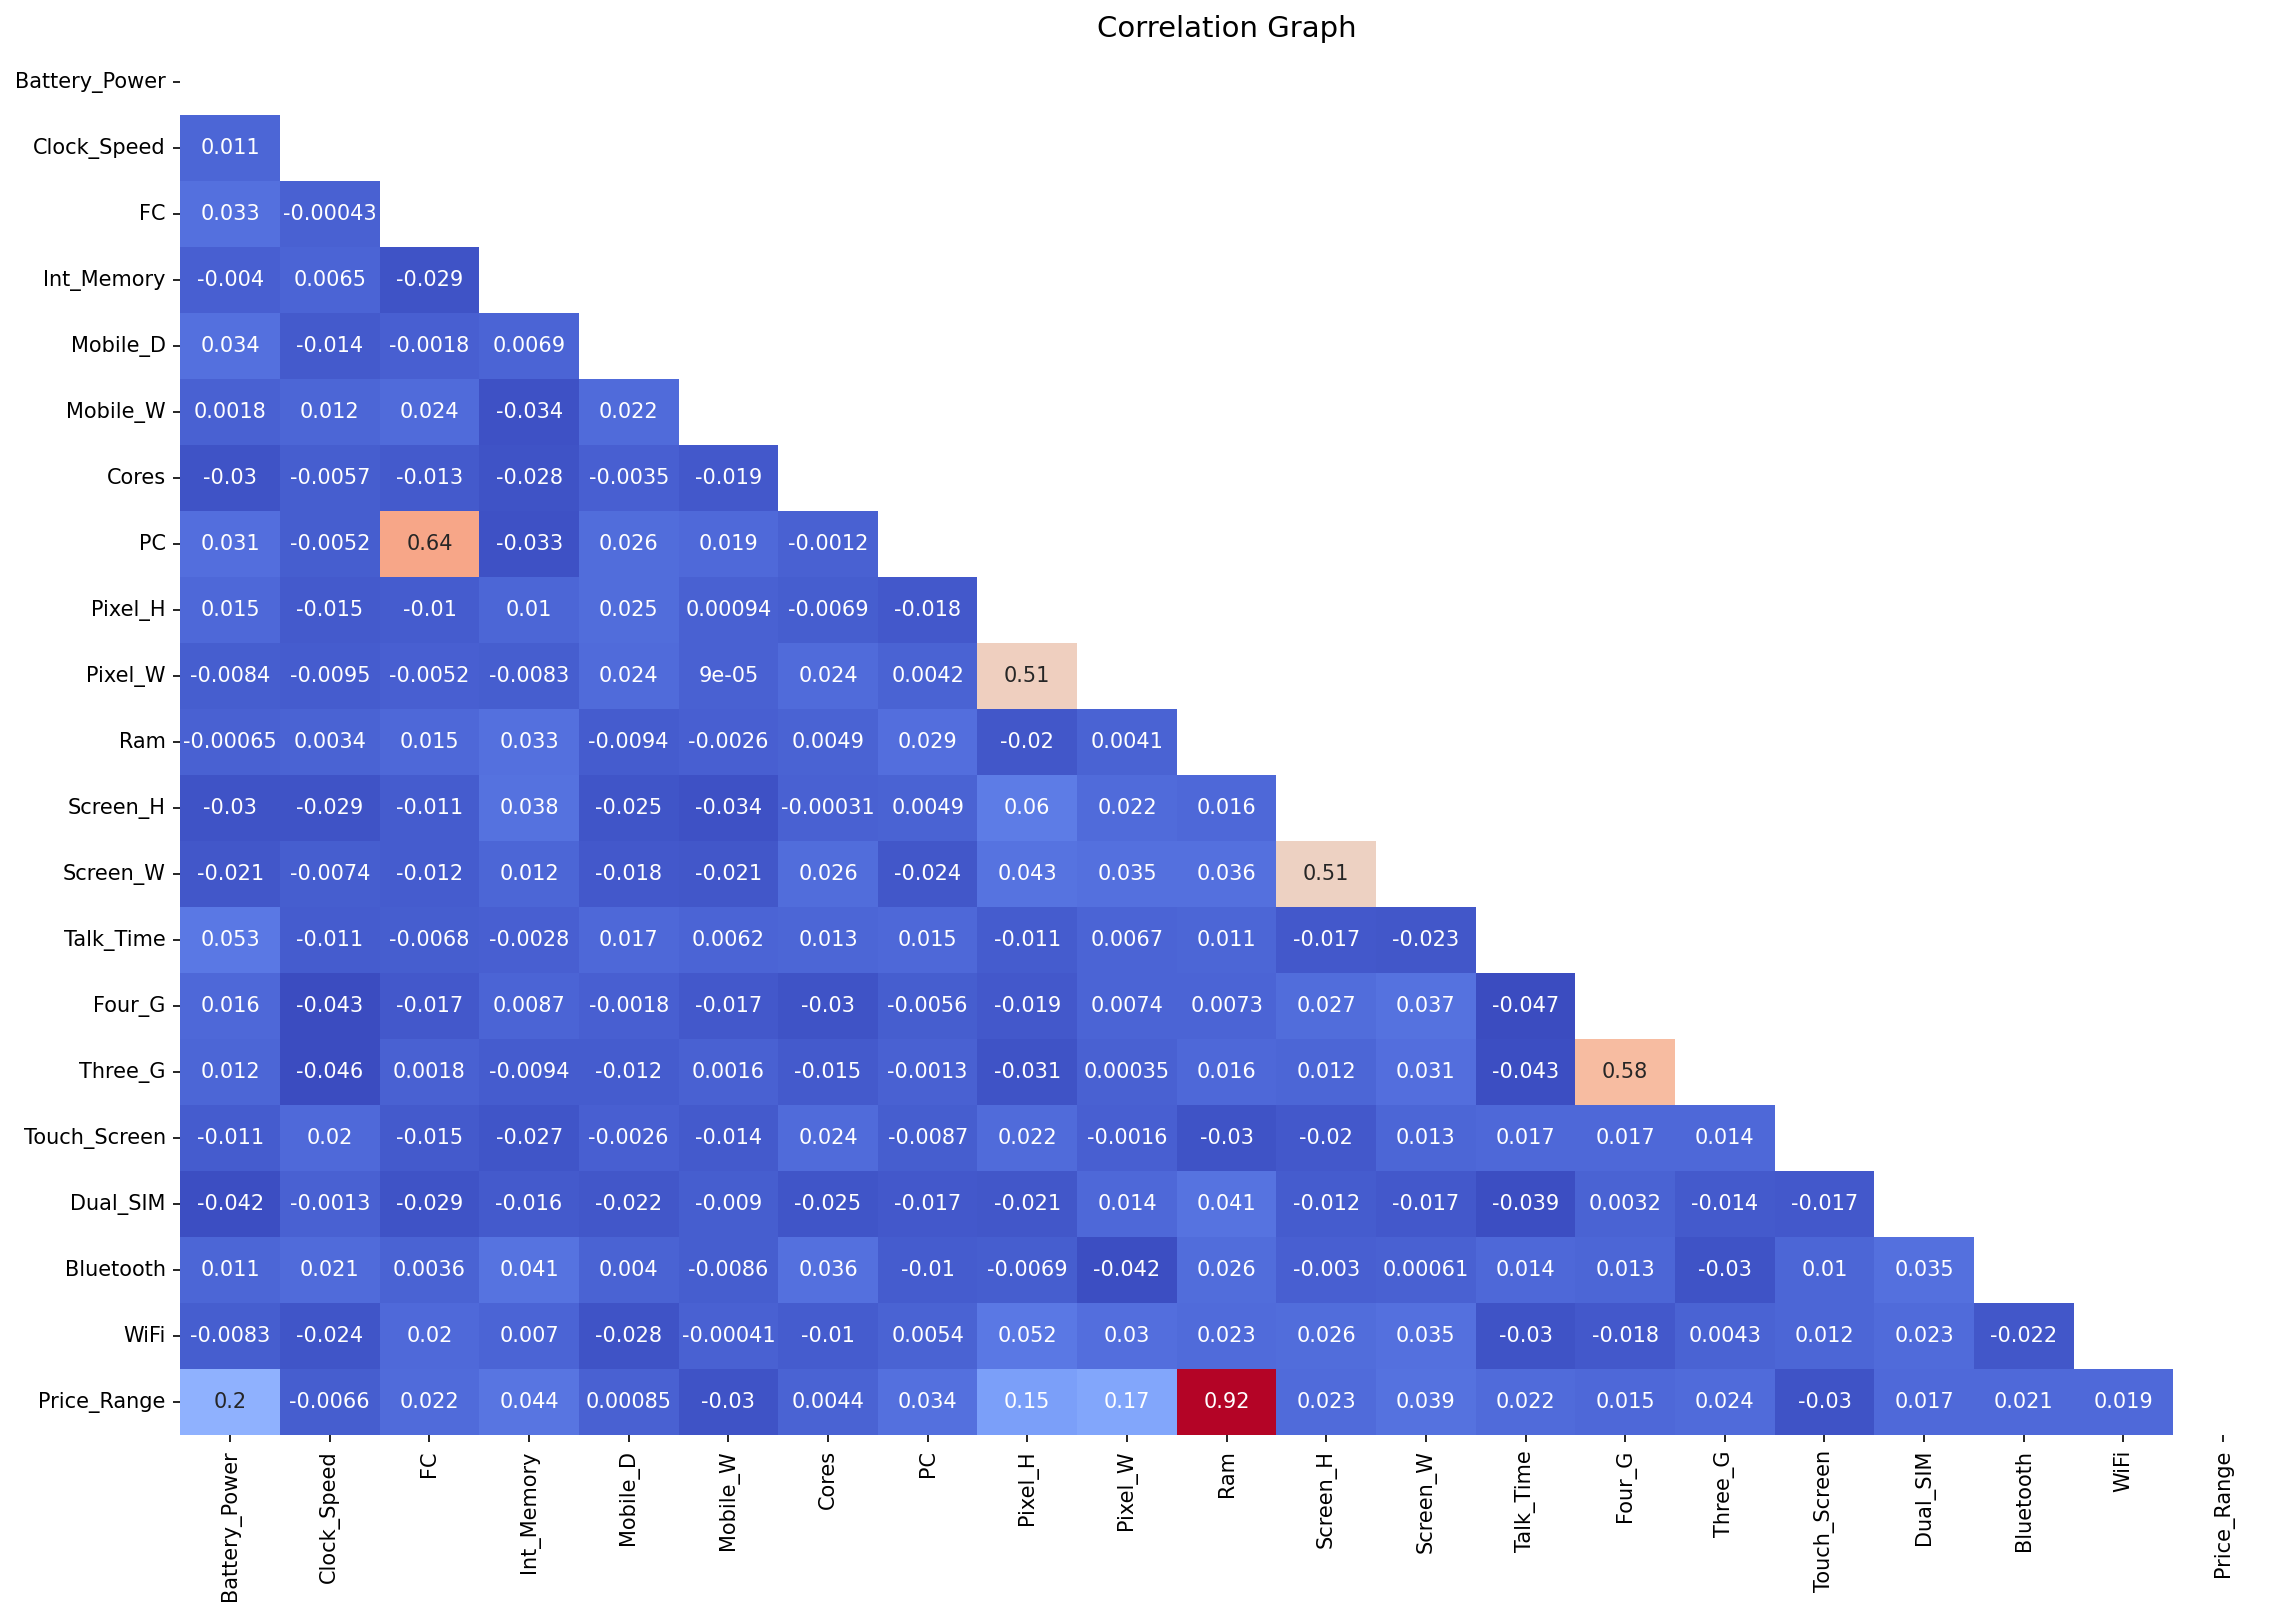

In [42]:
plt.figure (figsize = [18,12] ,  dpi = 150 )
plt.title ("Correlation Graph" , fontsize = 14)
matrix = np.triu (df.corr ())
sns.heatmap (df.corr(), annot = True, cmap = 'coolwarm', mask = matrix , cbar = False)
plt.show ()

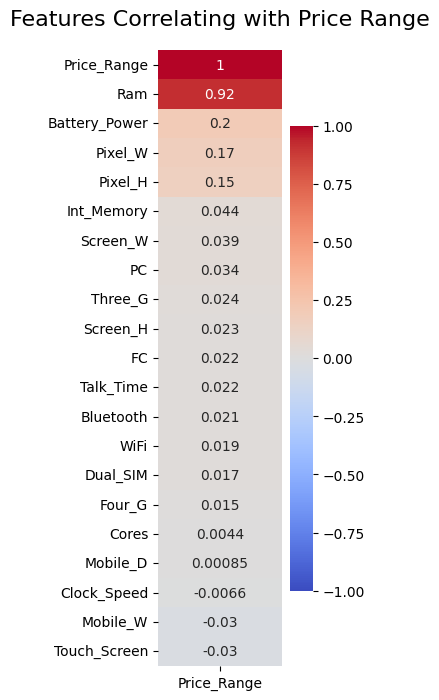

In [43]:
plt.figure (figsize = (2 , 8) , dpi = 100)
heatmap = sns.heatmap (df.corr()[['Price_Range']].sort_values (by = 'Price_Range', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':16} , pad = 18);

✅ Observations:

    "Price_Range" has the highest positive correlation with "Ram" (correlation of 0.92).
    "Price_Range" has quite moderate positive correlation with "Battery_Power","Pixel_W", and "Pixel_H" (0.2, 0.17, 0.15).

In [46]:
# Correlation among categorical columns
import scipy.stats as stats

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = stats.chi2_contingency(contingency_table)
    n = len(x)
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

def categorical_correlation(data, cols):
    # Compute pairwise Cramér's V
    results = {}
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            v = cramers_v(data[cols[i]], data[cols[j]])
            results[f"{cols[i]} vs {cols[j]}"] = v
    
    # Print the results
    for pair, v in results.items():
        # Interpretation
        if v < 0.1:
            corr = "Weak correlation ==>> No DROP"
        elif v < 0.9:
            corr = "Moderate correlation ==>> No DROP"
        else:
            corr = "Strong correlation ==>> DROP One"
            
        print(f"{pair}: Cramér's V = {v:.4f}, {corr}" )

In [47]:
cat_cols = [
    "Cores",          
    "Four_G",        
    "Three_G",      
    "Touch_Screen",  
    "Dual_SIM",      
    "Bluetooth",     
    "WiFi"          
]

categorical_correlation(df, cat_cols)


Cores vs Four_G: Cramér's V = 0.0722, Weak correlation ==>> No DROP
Cores vs Three_G: Cramér's V = 0.0632, Weak correlation ==>> No DROP
Cores vs Touch_Screen: Cramér's V = 0.0442, Weak correlation ==>> No DROP
Cores vs Dual_SIM: Cramér's V = 0.0442, Weak correlation ==>> No DROP
Cores vs Bluetooth: Cramér's V = 0.0591, Weak correlation ==>> No DROP
Cores vs WiFi: Cramér's V = 0.0252, Weak correlation ==>> No DROP
Four_G vs Three_G: Cramér's V = 0.5831, Moderate correlation ==>> No DROP
Four_G vs Touch_Screen: Cramér's V = 0.0158, Weak correlation ==>> No DROP
Four_G vs Dual_SIM: Cramér's V = 0.0022, Weak correlation ==>> No DROP
Four_G vs Bluetooth: Cramér's V = 0.0124, Weak correlation ==>> No DROP
Four_G vs WiFi: Cramér's V = 0.0166, Weak correlation ==>> No DROP
Three_G vs Touch_Screen: Cramér's V = 0.0127, Weak correlation ==>> No DROP
Three_G vs Dual_SIM: Cramér's V = 0.0128, Weak correlation ==>> No DROP
Three_G vs Bluetooth: Cramér's V = 0.0291, Weak correlation ==>> No DROP
Th

### ✅ Observations:

    No strong correlations among the categorical columns, no need to drop any columns

In [50]:

def numerical_correlation(num_cols, df, threshold=0.9):
    """
    Computes the Pearson correlation between numerical columns and suggests columns to drop.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    threshold (float): Correlation threshold to drop highly correlated columns.

    Returns:
    None (prints results)
    """

    # Select only numerical columns (int and float)
    # num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Compute correlation matrix
    corr_matrix = df[num_cols].corr().abs()

    # Store pairs of columns with high correlation
    to_drop = set()
    results = {}

    # Iterate through the upper triangle of the correlation matrix
    for i in range(len(num_cols)):
        for j in range(i + 1, len(num_cols)):
            col1, col2 = num_cols[i], num_cols[j]
            corr_value = corr_matrix.loc[col1, col2]

            # Store correlation results
            results[f"{col1} vs {col2}"] = corr_value

            # Check if correlation is above threshold
            if corr_value > threshold:
                to_drop.add(col2)  # Drop one of the correlated columns

    # Print correlation results
    for pair, v in results.items():
        if v < 0.1:
            corr = "Weak correlation ==>> No DROP"
        elif v < 0.9:
            corr = "Moderate correlation ==>> No DROP"
        else:
            corr = "Strong correlation ==>> DROP One"
        
        print(f"{pair}: Pearson's r = {v:.4f}, {corr}")

    print("\n✅ **Columns to Keep:**", [col for col in num_cols if col not in to_drop])
    print("❌ **Columns to Drop:**", list(to_drop))


In [51]:
num_columns = [
    "Battery_Power",
    "Clock_Speed",
    "FC",
    "Int_Memory",
    "Mobile_D",
    "Mobile_W",
    "PC",
    "Pixel_H",
    "Pixel_W",
    "Ram",
    "Screen_H",
    "Screen_W",
    "Talk_Time"
]
numerical_correlation(num_columns, df)


Battery_Power vs Clock_Speed: Pearson's r = 0.0115, Weak correlation ==>> No DROP
Battery_Power vs FC: Pearson's r = 0.0333, Weak correlation ==>> No DROP
Battery_Power vs Int_Memory: Pearson's r = 0.0040, Weak correlation ==>> No DROP
Battery_Power vs Mobile_D: Pearson's r = 0.0341, Weak correlation ==>> No DROP
Battery_Power vs Mobile_W: Pearson's r = 0.0018, Weak correlation ==>> No DROP
Battery_Power vs PC: Pearson's r = 0.0314, Weak correlation ==>> No DROP
Battery_Power vs Pixel_H: Pearson's r = 0.0149, Weak correlation ==>> No DROP
Battery_Power vs Pixel_W: Pearson's r = 0.0084, Weak correlation ==>> No DROP
Battery_Power vs Ram: Pearson's r = 0.0007, Weak correlation ==>> No DROP
Battery_Power vs Screen_H: Pearson's r = 0.0300, Weak correlation ==>> No DROP
Battery_Power vs Screen_W: Pearson's r = 0.0214, Weak correlation ==>> No DROP
Battery_Power vs Talk_Time: Pearson's r = 0.0525, Weak correlation ==>> No DROP
Clock_Speed vs FC: Pearson's r = 0.0004, Weak correlation ==>> No

### ✅ Observations:

    No strong correlations among the numerical columns, no need to drop

In [55]:
def plot_distribution(df, income_col):
    plt.figure(figsize=(16, 6))

    # Histogram & KDE Plot
    plt.subplot(1, 2, 1)
    sns.histplot(df[income_col], bins=50, kde=True, color='blue')
    plt.title(f'Distribution of {income_col}')
    plt.xlabel(income_col)
    plt.ylabel('Frequency')

    # Boxplot to detect outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[income_col], color='orange')
    plt.title(f'Boxplot of {income_col}')

    plt.show()

def log_transform(df, cols):
    """Applies log transformation to the specified columns."""
    for col in cols:
        df[col] = np.log1p(df[col])  # log(1 + x) to handle zero values
    return df

def standard_scale(df, cols):
    """Applies StandardScaler (mean=0, std=1) to the specified columns."""
    scaler = StandardScaler()
    df[cols] = scaler.fit_transform(df[cols])
    return df

def minmax_scale(df, cols):
    """Applies MinMaxScaler (scales data between 0 and 1) to the specified columns."""
    scaler = MinMaxScaler()
    df[cols] = scaler.fit_transform(df[cols])
    return df

def robust_scale(df, cols):
    """Applies RobustScaler (scales data using median and IQR) to the specified columns."""
    scaler = RobustScaler()
    df[cols] = scaler.fit_transform(df[cols])
    return df
    
def yeo_johnson_scale(df, cols):
    """Applies Yeo-Johnson transformation (handles zero and negative values)."""
    for col in cols:
        df[col], _ = yeojohnson(df[col])  # No need to add a small value
    return df


def power_transform(df, cols):
    """Applies Box-Cox transformation to the specified columns (requires positive values)."""
    for col in cols:
        df[col], _ = boxcox(df[col] + 1e-6)  # Adding small value to avoid zero issues
    return df

# def boxcox_transform(df, cols):
#     """Applies Box-Cox transformation (only for positive values)."""
#     for col in cols:
#         # if (df[col] <= 0).any():
#         #     raise ValueError(f"Box-Cox requires positive values. Column '{col}' contains non-positive values.")
#         df[col], _ = boxcox(df[col]+ 1e-6)  # No need to add a small value if all values are positive
#     return df

def apply_transformations(df, recommendations):
    """
    Apply appropriate transformations based on the recommendations dictionary.

    Parameters:
    df (pd.DataFrame): Input DataFrame
    recommendations (dict): Dictionary of column names and transformation type

    Returns:
    pd.DataFrame: Transformed DataFrame
    """
    # Categorizing columns based on recommended transformations
    no_transform_cols = [col for col, trans in recommendations.items() if "No transformation" in trans]
    log_transform_cols = [col for col, trans in recommendations.items() if "Log Transform" in trans]
    standard_scale_cols = [col for col, trans in recommendations.items() if "StandardScaler" in trans]
    minmax_scale_cols = [col for col, trans in recommendations.items() if "MinMaxScaler" in trans]
    robust_scale_cols = [col for col, trans in recommendations.items() if "RobustScaler" in trans]
    yeo_johnson_scale_cols = [col for col, trans in recommendations.items() if "Yeo-Johnson" in trans]
    power_transform_cols = [col for col, trans in recommendations.items() if "Power Transform" in trans]
    # boxcox_transform_cols = [col for col, trans in recommendations.items() if "Box-Cox" in trans]
    
    # Apply transformations
    if no_transform_cols:
        pass
    if log_transform_cols:
        df = log_transform(df, log_transform_cols)
    if power_transform_cols:
        df = power_transform(df, power_transform_cols)
    if standard_scale_cols:
        df = standard_scale(df, standard_scale_cols)
    if minmax_scale_cols:
        df = minmax_scale(df, minmax_scale_cols)
    if robust_scale_cols:
        df = robust_scale(df, robust_scale_cols)
    if yeo_johnson_scale_cols:
        df = yeo_johnson_scale(df, yeo_johnson_scale_cols)
    # if log_transform_cols:
    #     df = boxcox_transform(df, boxcox_transform_cols)

    return df

def analyze_distributions(df, cols):
    """
    Analyze distributions for multiple columns and recommend appropriate scalers.

    Parameters:
    df (pd.DataFrame): The dataframe containing the columns.
    cols (list): List of column names to analyze.

    Returns:
    dict: A dictionary with columns as keys and recommended scalers as values.
    """
    recommendations = {}

    for col in cols:
        print(f"\nAnalyzing '{col}':")
        data = df[col].dropna()  # Drop missing values if any

        # Compute Skewness & Kurtosis
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)

        print(f"  Skewness: {skewness:.3f}")
        print(f"  Kurtosis: {kurtosis:.3f}")

        anderson_result = anderson(data, dist='norm')
        is_normal = anderson_result.statistic < anderson_result.critical_values[2]  # 5% level

        # # Choose the best scaler based on skewness


        if is_normal:
            scaler = "No transformation needed (Data follows normal distribution)"
        elif abs(skewness) < 0.5 and kurtosis < 3:
            scaler = "StandardScaler (Data is approximately normal, low kurtosis)"
        elif abs(skewness) < 0.5 and kurtosis >= 3:
            scaler = "RobustScaler (Data is approximately normal but has outliers - high kurtosis)"
        elif 0.5 <= skewness < 2 and kurtosis < 3:
            scaler = "Log Transform (Moderate right skew, low kurtosis)"
        elif 0.5 <= skewness < 2 and kurtosis >= 3:
            scaler = "Yeo-Johnson (Moderate right skew, high kurtosis)"
        elif skewness >= 2:
            scaler = "Yeo-Johnson (Highly right-skewed, severe outliers)"
        elif -2 < skewness <= -0.5 and kurtosis < 3:
            scaler = "MinMaxScaler (Moderate left skew, low kurtosis)"
        elif -2 < skewness <= -0.5 and kurtosis >= 3:
            scaler = "RobustScaler (Moderate left skew, high kurtosis)"
        elif skewness <= -2:
            scaler = "RobustScaler (Highly left-skewed, severe outliers)"
        else:
            scaler = "Yeo-Johnson (Uncertain pattern, using flexible transformation)"

        recommendations[col] = scaler
        print(f"  Recommended Scaler: {scaler}")

        # Plot Distribution
        plot_distribution(df, col)

    return recommendations


Analyzing 'Battery_Power':
  Skewness: 0.032
  Kurtosis: -1.224
  Recommended Scaler: StandardScaler (Data is approximately normal, low kurtosis)


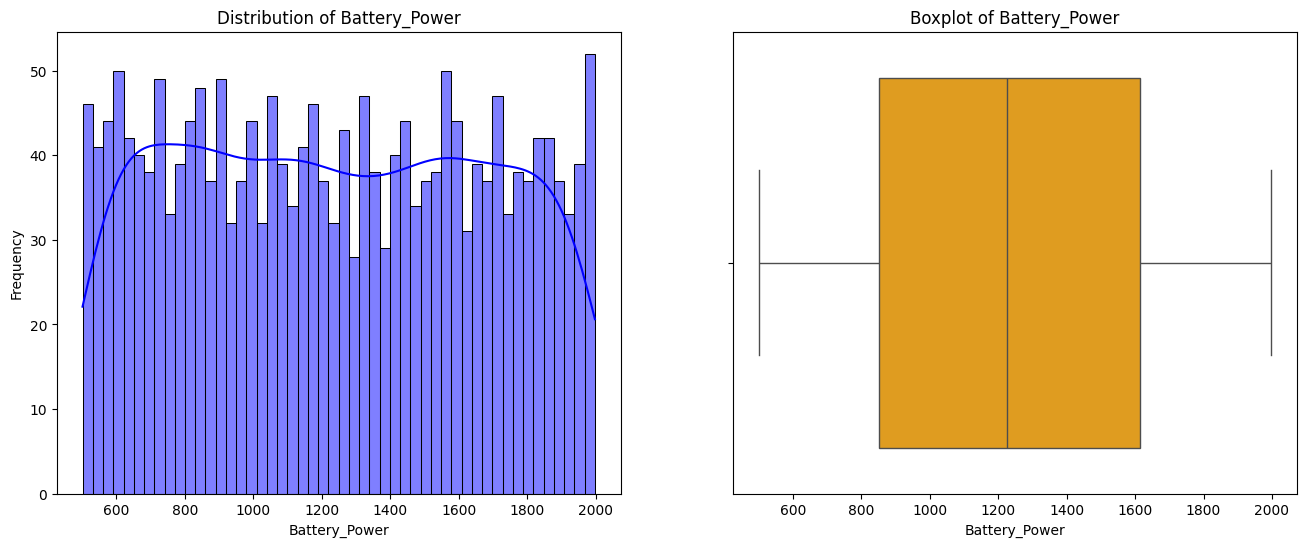


Analyzing 'Clock_Speed':
  Skewness: 0.178
  Kurtosis: -1.323
  Recommended Scaler: StandardScaler (Data is approximately normal, low kurtosis)


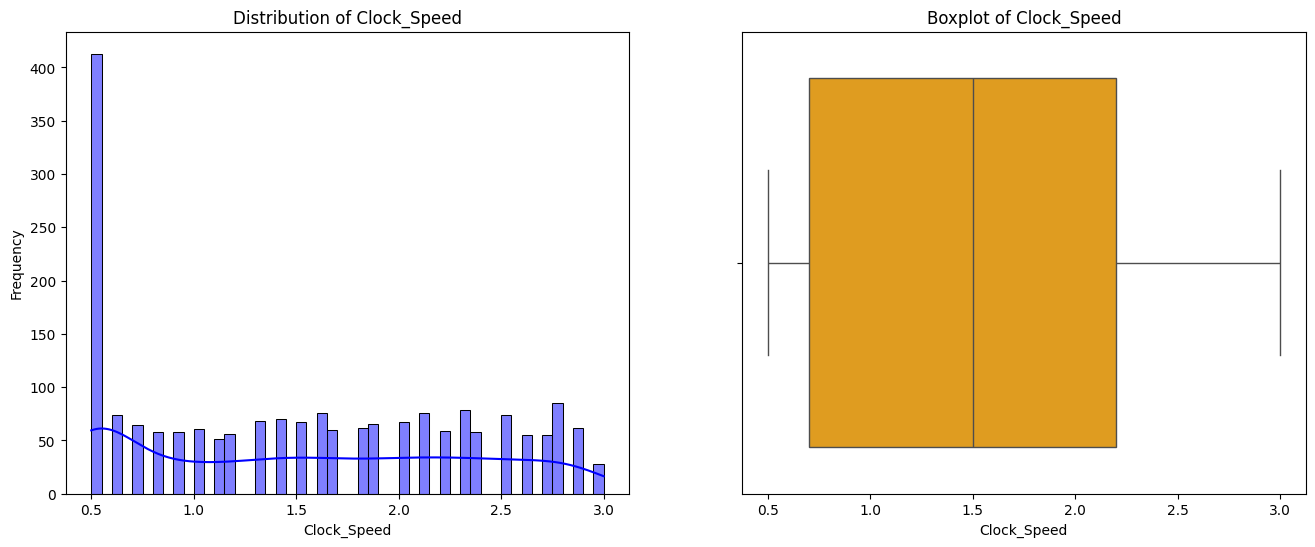


Analyzing 'FC':
  Skewness: 1.019
  Kurtosis: 0.273
  Recommended Scaler: Log Transform (Moderate right skew, low kurtosis)


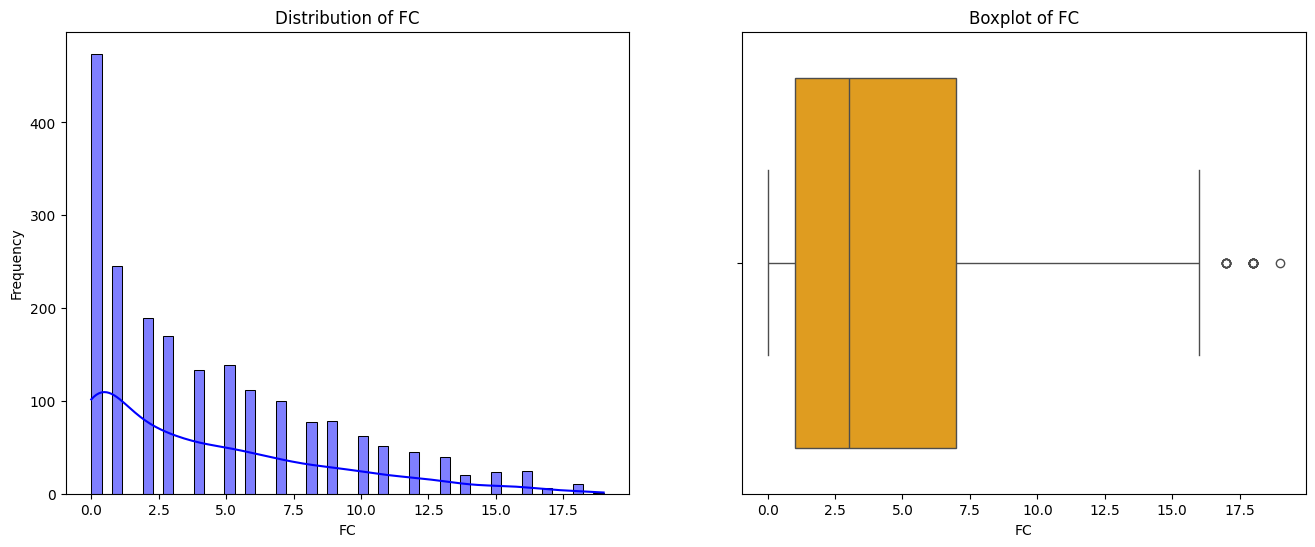


Analyzing 'Int_Memory':
  Skewness: 0.058
  Kurtosis: -1.216
  Recommended Scaler: StandardScaler (Data is approximately normal, low kurtosis)


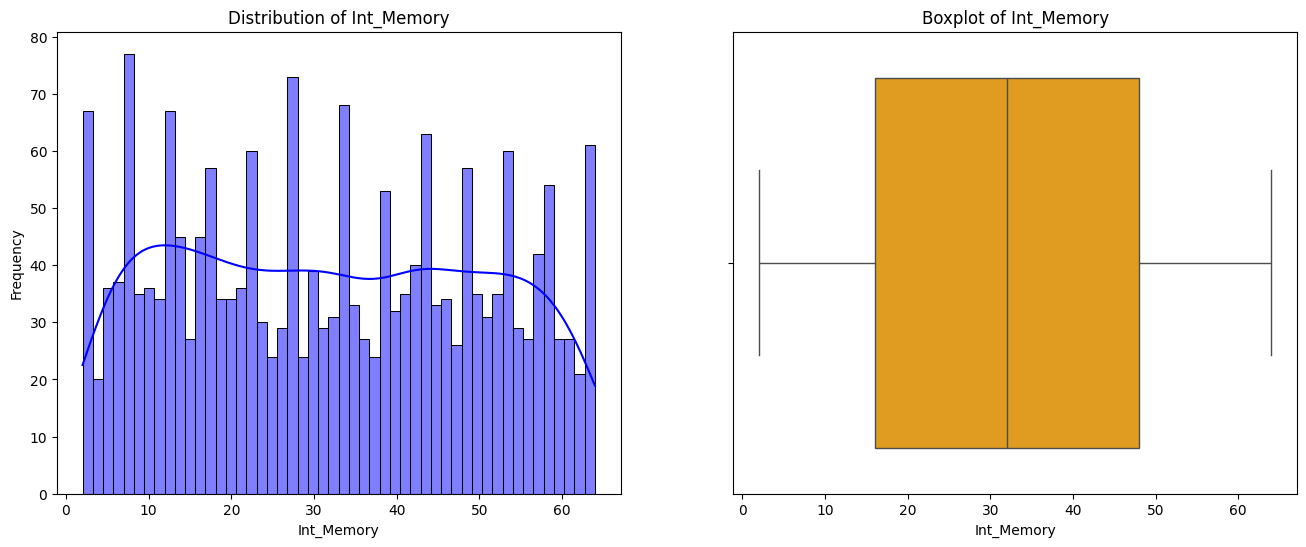


Analyzing 'Mobile_D':
  Skewness: 0.089
  Kurtosis: -1.274
  Recommended Scaler: StandardScaler (Data is approximately normal, low kurtosis)


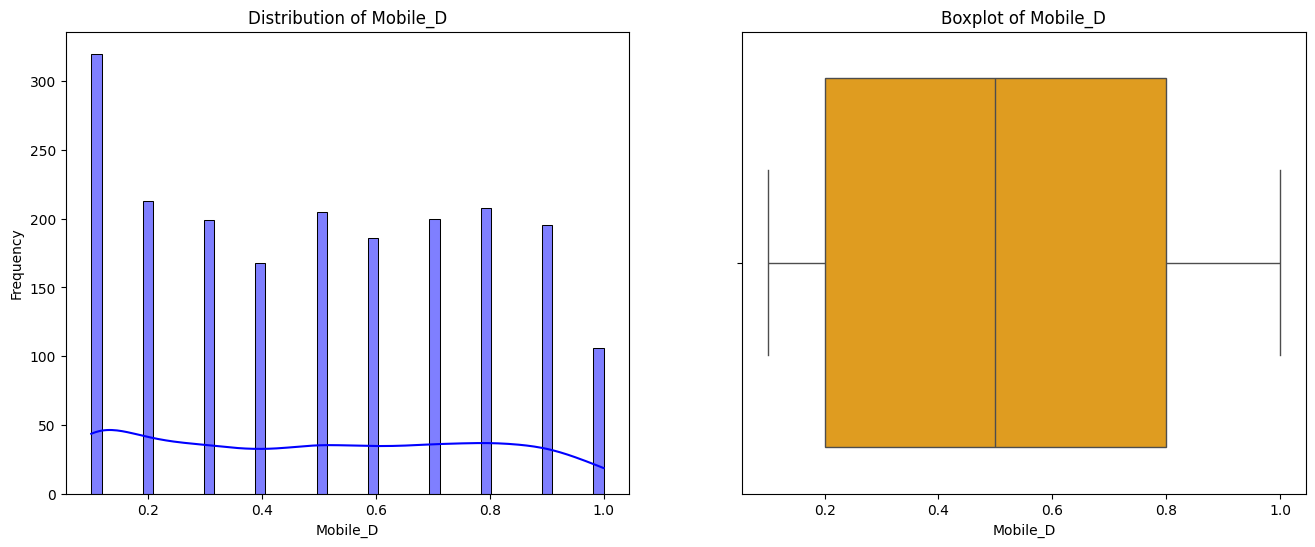


Analyzing 'Mobile_W':
  Skewness: 0.007
  Kurtosis: -1.210
  Recommended Scaler: StandardScaler (Data is approximately normal, low kurtosis)


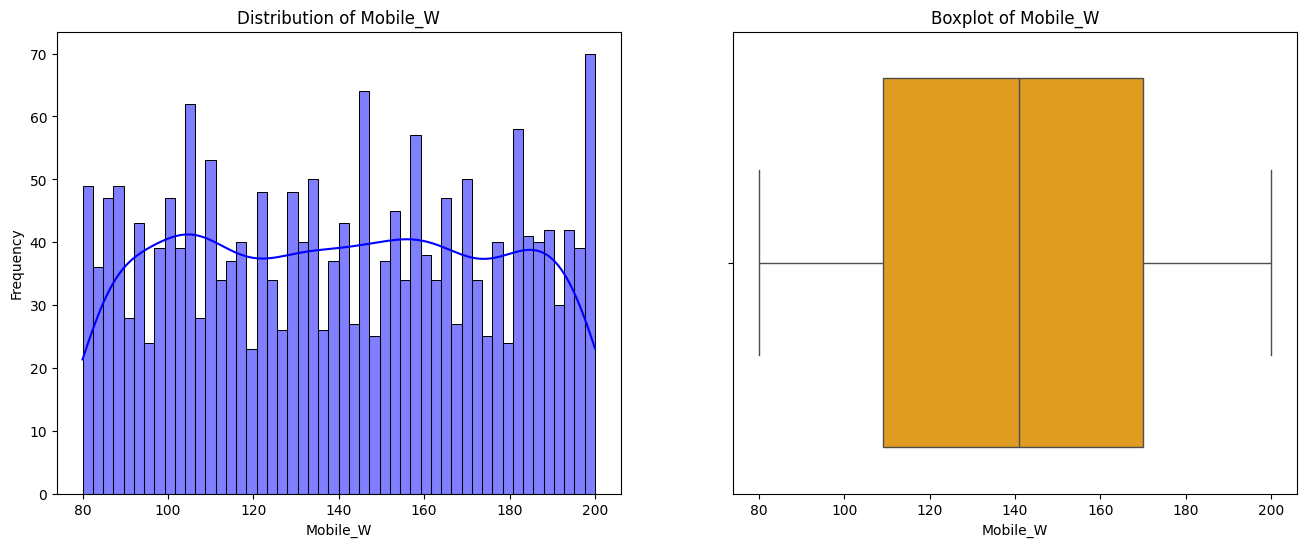


Analyzing 'PC':
  Skewness: 0.017
  Kurtosis: -1.172
  Recommended Scaler: StandardScaler (Data is approximately normal, low kurtosis)


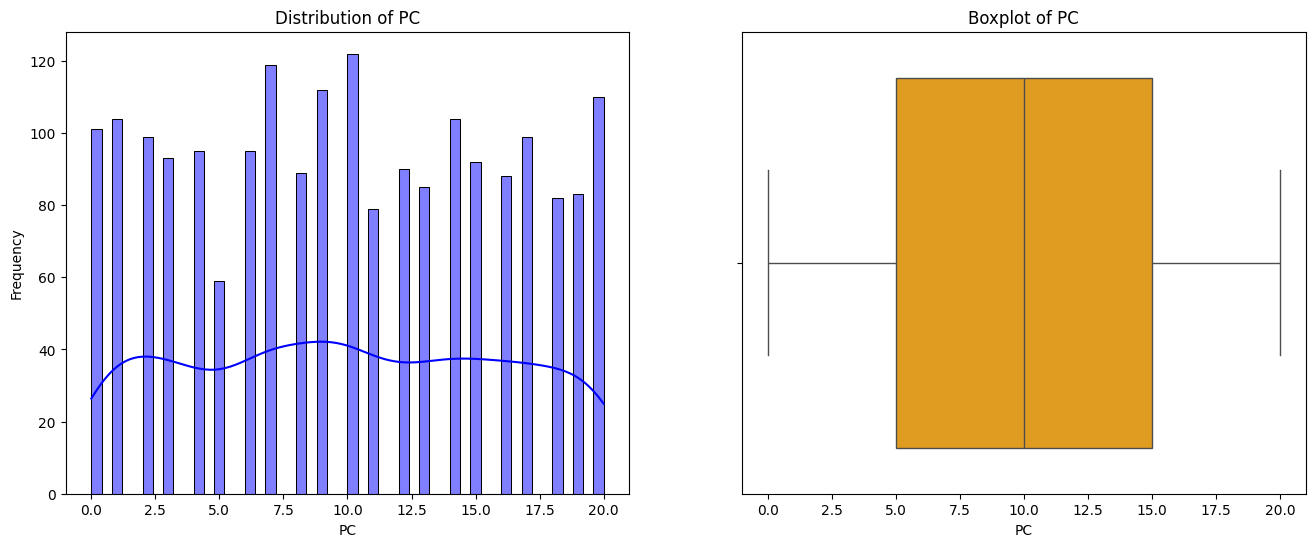


Analyzing 'Pixel_H':
  Skewness: 0.666
  Kurtosis: -0.318
  Recommended Scaler: Log Transform (Moderate right skew, low kurtosis)


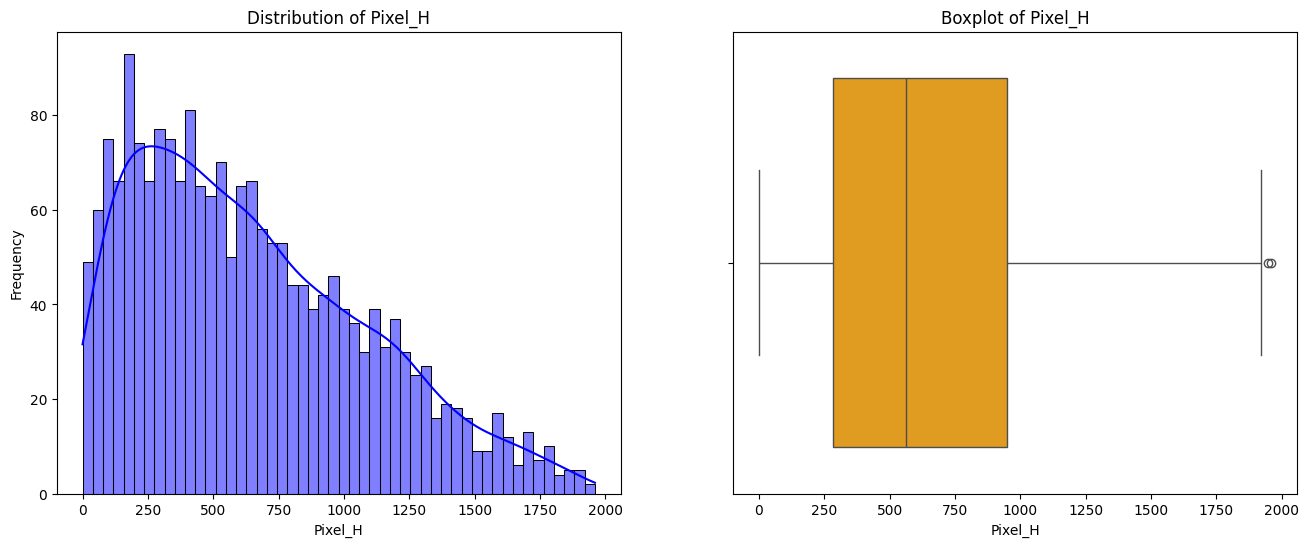


Analyzing 'Pixel_W':
  Skewness: 0.015
  Kurtosis: -1.186
  Recommended Scaler: StandardScaler (Data is approximately normal, low kurtosis)


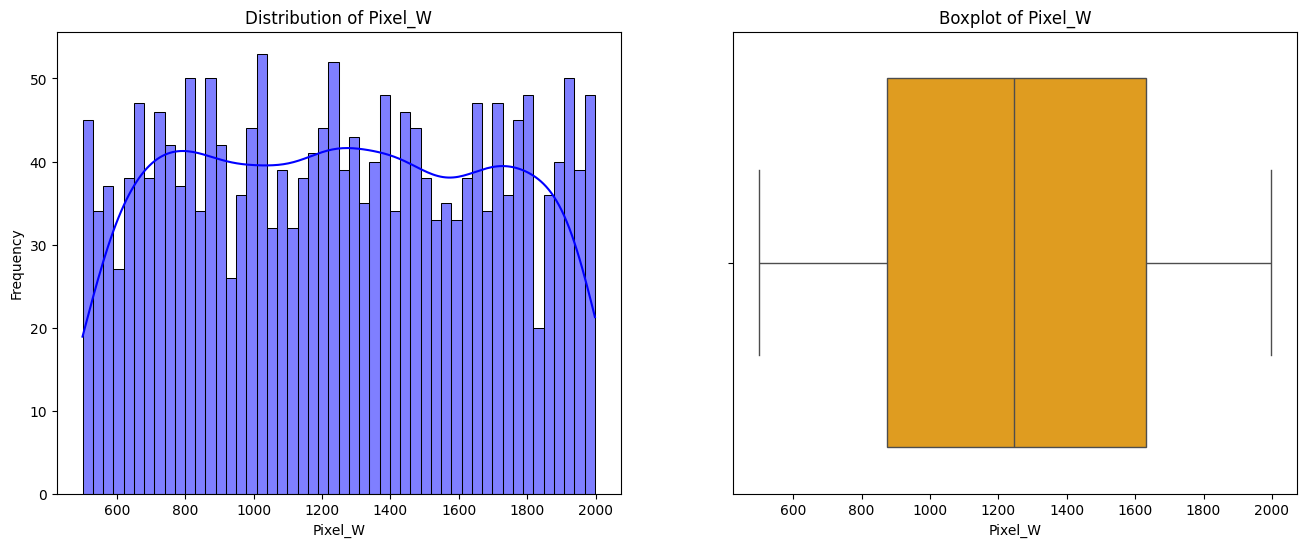


Analyzing 'Ram':
  Skewness: 0.007
  Kurtosis: -1.192
  Recommended Scaler: StandardScaler (Data is approximately normal, low kurtosis)


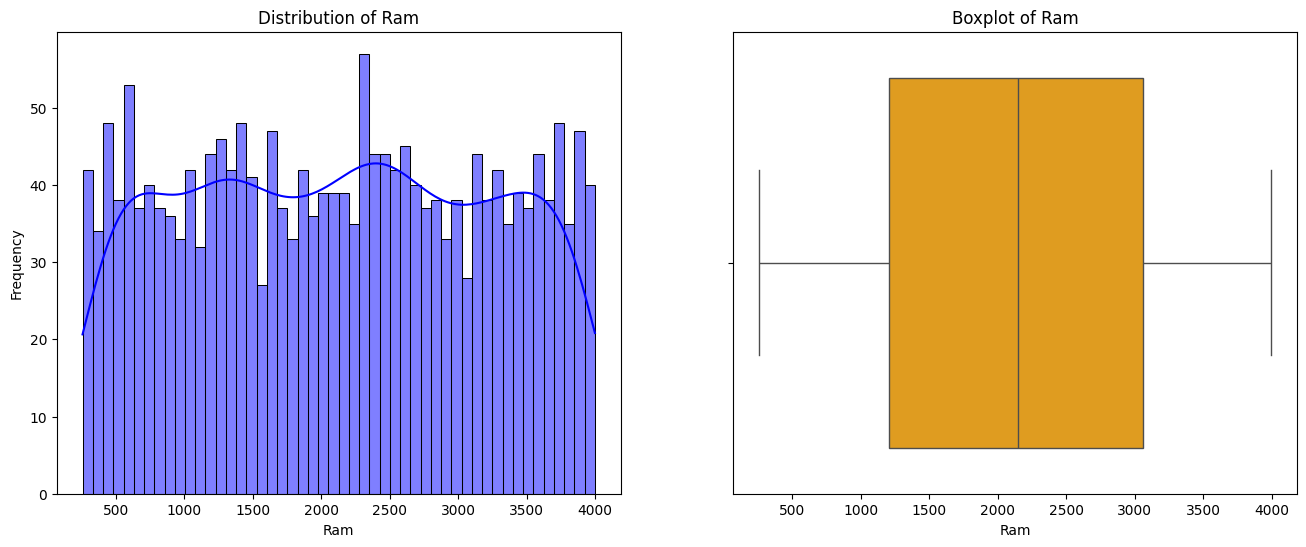


Analyzing 'Screen_H':
  Skewness: -0.099
  Kurtosis: -1.191
  Recommended Scaler: StandardScaler (Data is approximately normal, low kurtosis)


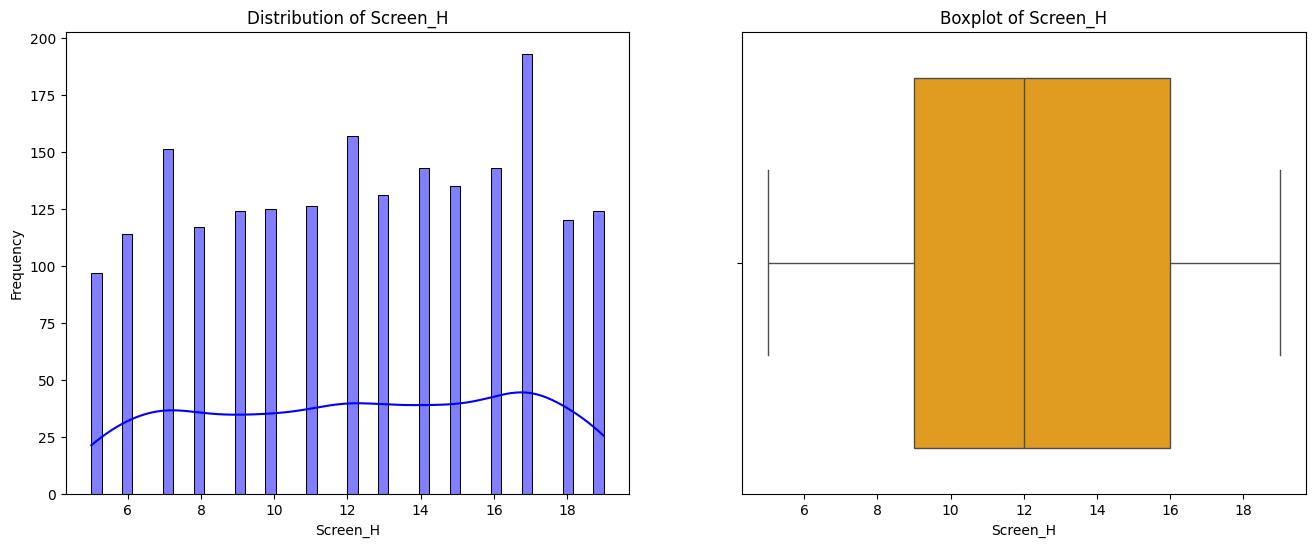


Analyzing 'Screen_W':
  Skewness: 0.633
  Kurtosis: -0.392
  Recommended Scaler: Log Transform (Moderate right skew, low kurtosis)


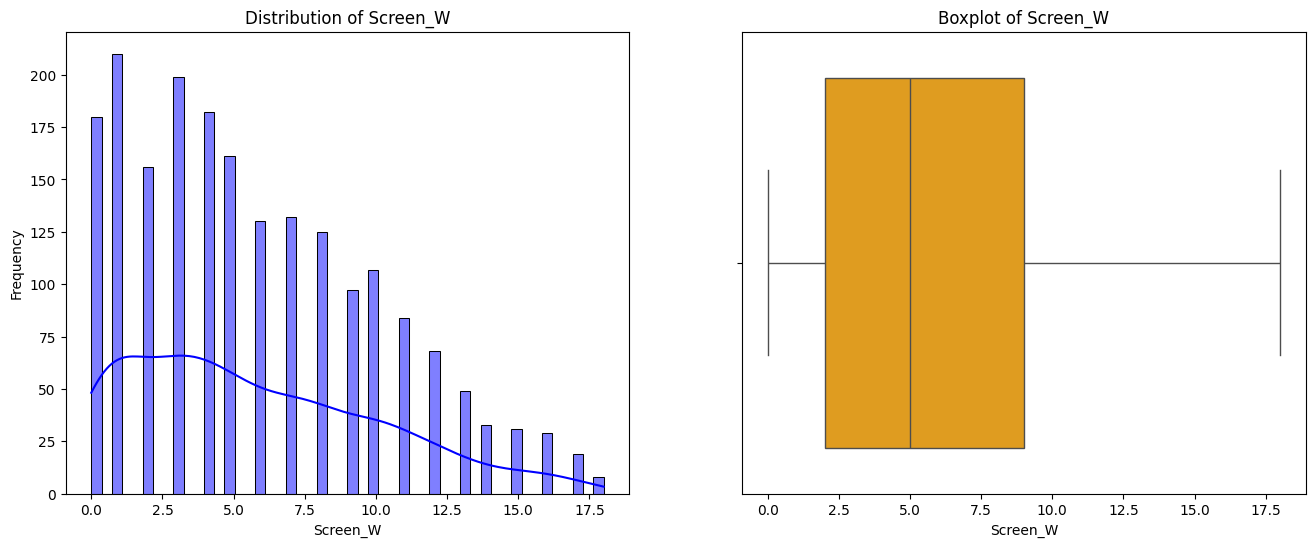


Analyzing 'Talk_Time':
  Skewness: 0.010
  Kurtosis: -1.219
  Recommended Scaler: StandardScaler (Data is approximately normal, low kurtosis)


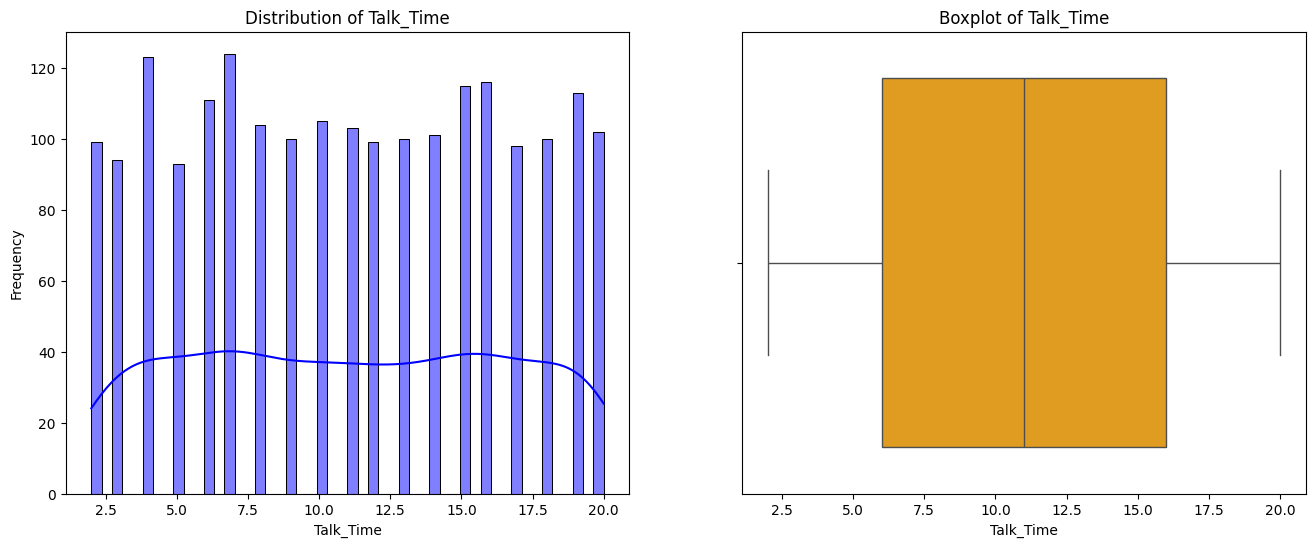

In [57]:
recommendations = analyze_distributions(df, num_columns)

In [61]:
recommendations

{'Battery_Power': 'StandardScaler (Data is approximately normal, low kurtosis)',
 'Clock_Speed': 'StandardScaler (Data is approximately normal, low kurtosis)',
 'FC': 'Log Transform (Moderate right skew, low kurtosis)',
 'Int_Memory': 'StandardScaler (Data is approximately normal, low kurtosis)',
 'Mobile_D': 'StandardScaler (Data is approximately normal, low kurtosis)',
 'Mobile_W': 'StandardScaler (Data is approximately normal, low kurtosis)',
 'PC': 'StandardScaler (Data is approximately normal, low kurtosis)',
 'Pixel_H': 'Log Transform (Moderate right skew, low kurtosis)',
 'Pixel_W': 'StandardScaler (Data is approximately normal, low kurtosis)',
 'Ram': 'StandardScaler (Data is approximately normal, low kurtosis)',
 'Screen_H': 'StandardScaler (Data is approximately normal, low kurtosis)',
 'Screen_W': 'Log Transform (Moderate right skew, low kurtosis)',
 'Talk_Time': 'StandardScaler (Data is approximately normal, low kurtosis)'}

In [62]:
df = apply_transformations(df, recommendations)

In [58]:
target_col = "Price_Range"

df["Price_Range"].value_counts ()

Price_Range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [59]:
import pandas as pd

def print_unique_values(df, columns):
    """
    Prints unique values for each column in the given list.

    Args:
        df (pd.DataFrame): The dataframe containing the data.
        columns (list): List of column names to check unique values for.
    """
    for col in columns:
        unique_values = df[col].unique()
        print(f"{col}: {unique_values}")

# Example usage:
cat_cols = ["Cores", "Four_G", "Three_G", "Touch_Screen", "Dual_SIM", "Bluetooth", "WiFi", "Price_Range"]
print_unique_values(df, cat_cols)

Cores: [2 3 5 6 1 8 4 7]
Four_G: [0 1]
Three_G: [0 1]
Touch_Screen: [0 1]
Dual_SIM: [0 1]
Bluetooth: [0 1]
WiFi: [1 0]
Price_Range: [1 2 3 0]


### Categorical columns Transformation
#### Ordinal Feature (Cores) → Use as is (Ordinal Encoding)

    Cores values range from 1 to 8, which represents an increasing number of CPU cores.
    Since it's an ordinal feature, can use it as-is.

#### Binary Categorical Features (0 or 1) → Use as is (No encoding needed)

    Four_G, Three_G, Touch_Screen, Dual_SIM, Bluetooth, WiFi
    These are already numeric (0/1), so they can be used directly.


#### Target Variable (Price_Range) → Use as a classification label

    Price_Range is the target variable with values 0, 1, 2, 3 (indicating different price levels).
    If model supports multi-class classification (like Decision Trees, Random Forest, XGBoost, etc.), no encoding is needed.
    

In [60]:
df['Price_Range'] = df['Price_Range'].astype('category')  # Ensure it's categorical

In [64]:
df.head()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,-0.902597,0.830779,0.693147,-1.380644,0.340740,1.349249,2,-1.305750,3.044522,-1.146784,...,-0.784983,2.079442,1.462493,0,0,0,0,0,1,1
1,-0.495139,-1.253064,0.000000,1.155024,0.687548,-0.120059,3,-0.645989,6.809039,1.704465,...,1.114266,1.386294,-0.734267,1,1,1,1,1,0,2
2,-1.537686,-1.253064,1.098612,0.493546,1.381165,0.134244,5,-0.645989,7.142037,1.074968,...,-0.310171,1.098612,-0.368140,1,1,1,1,1,0,2
3,-1.419319,1.198517,0.000000,-1.215274,1.034357,-0.261339,6,-0.151168,7.104144,1.236971,...,0.876859,2.197225,-0.002014,0,1,0,0,1,0,2
4,1.325906,-0.395011,2.639057,0.658915,0.340740,0.021220,2,0.673534,7.097549,-0.091452,...,-1.022389,1.098612,0.730240,1,1,1,0,1,0,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Battery_Power  2000 non-null   float64 
 1   Clock_Speed    2000 non-null   float64 
 2   FC             2000 non-null   float64 
 3   Int_Memory     2000 non-null   float64 
 4   Mobile_D       2000 non-null   float64 
 5   Mobile_W       2000 non-null   float64 
 6   Cores          2000 non-null   int64   
 7   PC             2000 non-null   float64 
 8   Pixel_H        2000 non-null   float64 
 9   Pixel_W        2000 non-null   float64 
 10  Ram            2000 non-null   float64 
 11  Screen_H       2000 non-null   float64 
 12  Screen_W       2000 non-null   float64 
 13  Talk_Time      2000 non-null   float64 
 14  Four_G         2000 non-null   int64   
 15  Three_G        2000 non-null   int64   
 16  Touch_Screen   2000 non-null   int64   
 17  Dual_SIM       2000 non-null   in

## Modeling

### Logistic Regression - Multinominal

      Why? Provides clear interpretability with probability scores.
            Interpretability: Coefficients show how features affect the probability of each price range.
            Handling Interaction Terms: Can include polynomial and interaction terms to improve performance.
            Limitations: Assumes linear decision boundaries between classes.

In [68]:

# Features and target
X = df.drop(columns=['Price_Range'])  # Features
y = df['Price_Range']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model (Multinomial Mode)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9275
Precision: 0.9278
Recall: 0.9275
F1-score: 0.9273

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       100
           1       0.89      0.92      0.91       100
           2       0.93      0.87      0.90       100
           3       0.93      0.97      0.95       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



#### Interpretion

    Overall, the model is performing very well (~93% on all metrics).
    Class 3 have the highest recall (0.97), meaning almost all are correctly classified.
    Class 2 has the lowest recall (0.87), meaning some of them are misclassified as other classes.


Class 0 Coefficients:
          Feature  Coefficient  Absolute Coefficient
10            Ram   -10.703696             10.703696
0   Battery_Power    -2.630811              2.630811
9         Pixel_W    -2.009623              2.009623
8         Pixel_H    -0.787060              0.787060
19           WiFi     0.492962              0.492962
5        Mobile_W     0.446571              0.446571
15        Three_G     0.286955              0.286955
18      Bluetooth     0.252667              0.252667
3      Int_Memory    -0.228618              0.228618
12       Screen_W     0.197267              0.197267
17       Dual_SIM     0.192472              0.192472
14         Four_G    -0.163975              0.163975
11       Screen_H    -0.162792              0.162792
2              FC     0.155945              0.155945
1     Clock_Speed     0.095446              0.095446
16   Touch_Screen     0.068021              0.068021
7              PC    -0.061464              0.061464
6           Cores     0

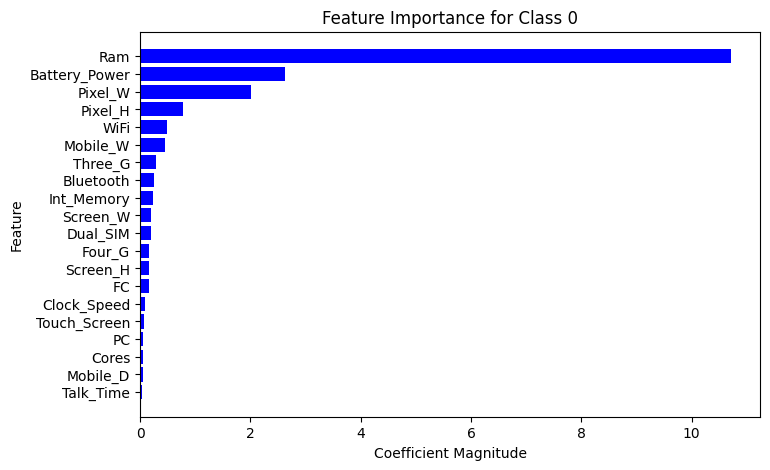


Class 1 Coefficients:
          Feature  Coefficient  Absolute Coefficient
10            Ram    -3.014023              3.014023
0   Battery_Power    -0.782510              0.782510
9         Pixel_W    -0.596139              0.596139
8         Pixel_H    -0.325070              0.325070
5        Mobile_W     0.160518              0.160518
16   Touch_Screen     0.139927              0.139927
11       Screen_H    -0.129500              0.129500
7              PC    -0.102953              0.102953
17       Dual_SIM     0.099875              0.099875
14         Four_G     0.096824              0.096824
4        Mobile_D     0.081271              0.081271
1     Clock_Speed    -0.078641              0.078641
2              FC     0.072104              0.072104
12       Screen_W     0.068581              0.068581
3      Int_Memory    -0.047170              0.047170
6           Cores    -0.044363              0.044363
15        Three_G     0.025824              0.025824
13      Talk_Time    -0

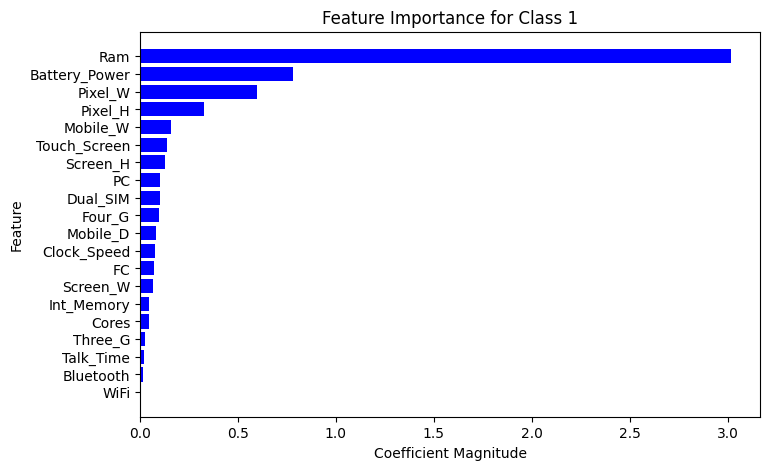


Class 2 Coefficients:
          Feature  Coefficient  Absolute Coefficient
10            Ram     3.393255              3.393255
0   Battery_Power     0.815030              0.815030
9         Pixel_W     0.623354              0.623354
8         Pixel_H     0.194252              0.194252
14         Four_G    -0.192474              0.192474
19           WiFi    -0.186793              0.186793
17       Dual_SIM    -0.181852              0.181852
16   Touch_Screen    -0.163362              0.163362
4        Mobile_D    -0.080270              0.080270
18      Bluetooth    -0.071746              0.071746
11       Screen_H    -0.049652              0.049652
2              FC    -0.048531              0.048531
1     Clock_Speed    -0.041956              0.041956
15        Three_G    -0.032442              0.032442
12       Screen_W    -0.027162              0.027162
3      Int_Memory     0.026180              0.026180
5        Mobile_W    -0.022185              0.022185
6           Cores     0

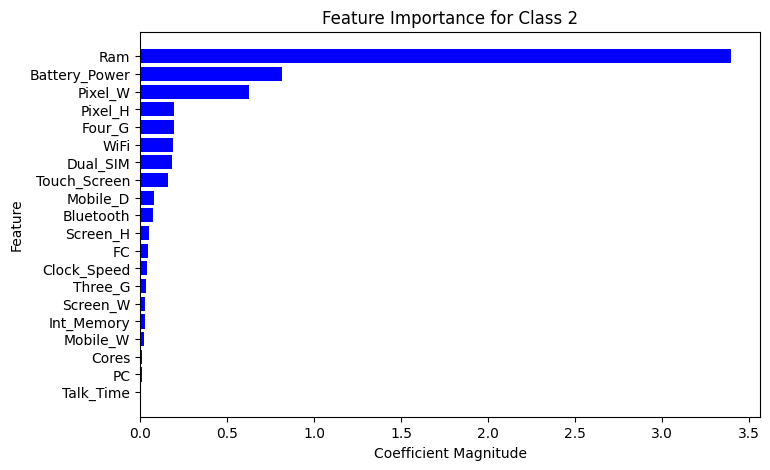


Class 3 Coefficients:
          Feature  Coefficient  Absolute Coefficient
10            Ram    10.324464             10.324464
0   Battery_Power     2.598291              2.598291
9         Pixel_W     1.982407              1.982407
8         Pixel_H     0.917879              0.917879
5        Mobile_W    -0.584903              0.584903
11       Screen_H     0.341944              0.341944
19           WiFi    -0.308133              0.308133
15        Three_G    -0.280337              0.280337
14         Four_G     0.259625              0.259625
3      Int_Memory     0.249608              0.249608
12       Screen_W    -0.238687              0.238687
18      Bluetooth    -0.193705              0.193705
2              FC    -0.179518              0.179518
7              PC     0.155538              0.155538
17       Dual_SIM    -0.110495              0.110495
13      Talk_Time     0.070652              0.070652
16   Touch_Screen    -0.044587              0.044587
4        Mobile_D     0

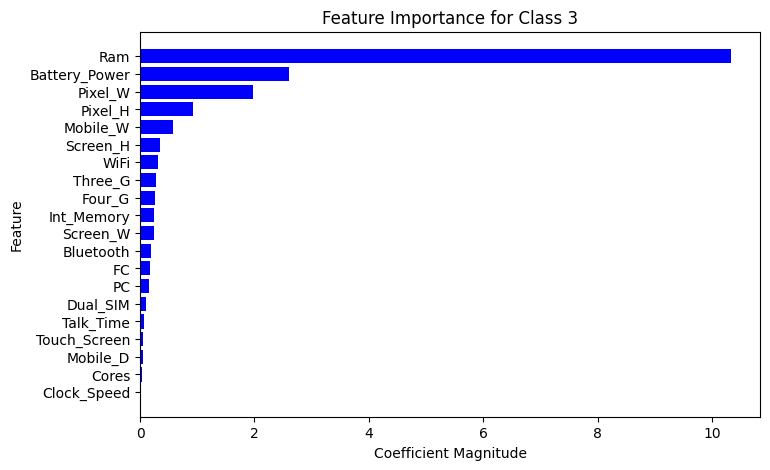

In [69]:
# Coefficients Interpretation
feature_names = X.columns
coefficients = model.coef_

# Since it's a multinomial classification, we get coefficients for each class
for i, class_coef in enumerate(coefficients):
    print(f"\nClass {i} Coefficients:")
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': class_coef})
    feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
    feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
    print(feature_importance)

    # Plot feature importance for this class
    plt.figure(figsize=(8, 5))
    plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'], color='blue')
    plt.xlabel('Coefficient Magnitude')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance for Class {i}')
    plt.gca().invert_yaxis()
    plt.show()

In [97]:
# Initialize SHAP Explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP Values for Test Data
shap_values = explainer(X_test)

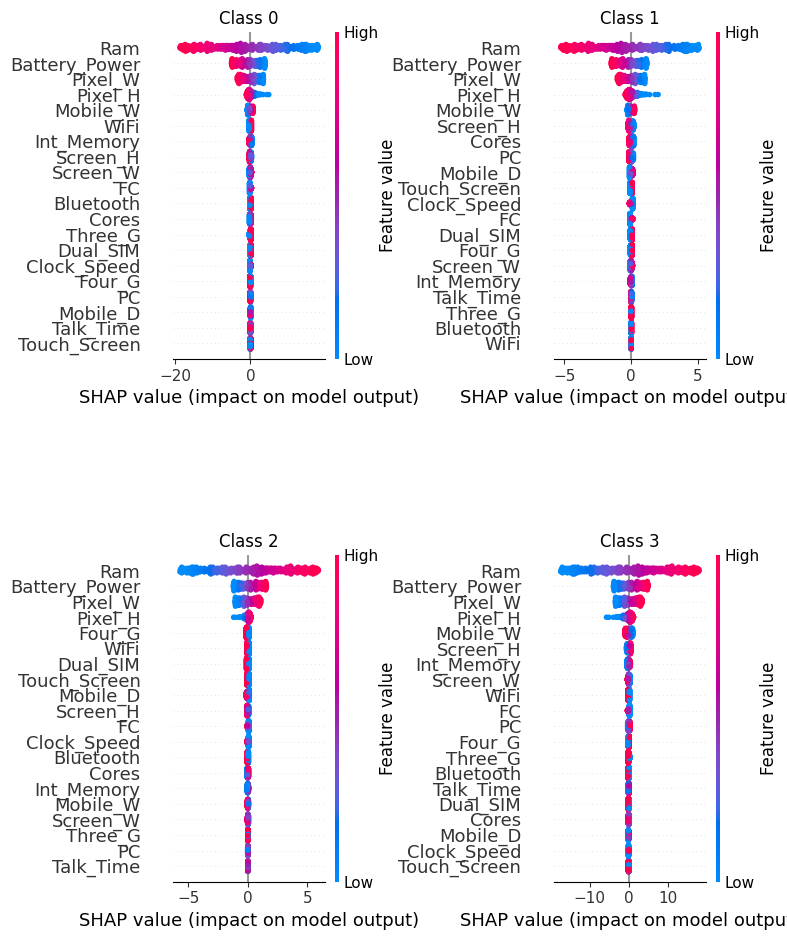

In [96]:
# Number of classes (4 in this case)
num_classes = shap_values.values.shape[2]

# Set grid layout (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(18, 10))  # 2x2 grid for better spacing

# Flatten axes for easy iteration
axes = axes.flatten()

for class_idx in range(num_classes):
    plt.sca(axes[class_idx])  # Set current axis
    shap.summary_plot(shap_values.values[:, :, class_idx], X_test, show=False)
    axes[class_idx].set_title(f"Class {class_idx}")  # Title for each class

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=1)  # Increase space between rows and columns
plt.show()

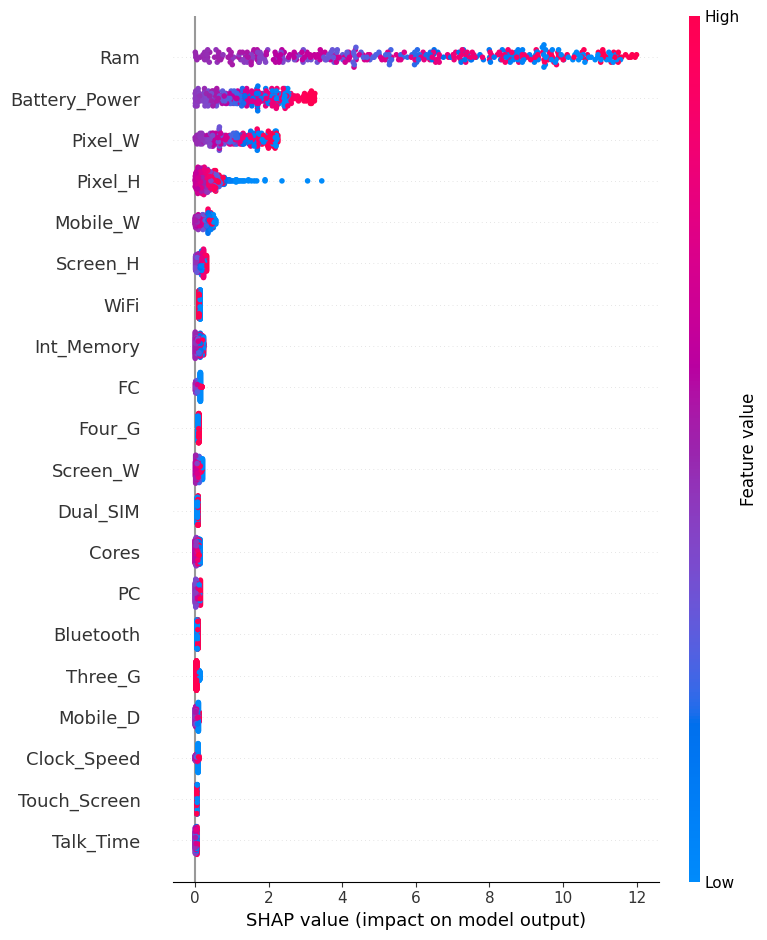

In [86]:
###global feature importance, take the mean absolute SHAP values across classes
shap_values_mean = np.abs(shap_values.values).mean(axis=2)  # Mean over classes
shap.summary_plot(shap_values_mean, X_test)

#### Interpretition of top two impact variables
    1. RAM

        SHAP Summary Insights:
        
            RAM has a strong positive impact on higher price ranges (Class 3, Class 2).
            It has a strong negative impact on lower price ranges (Class 0, Class 1).
            This means higher RAM increases the probability of being classified into higher price ranges.
            
        Coefficient Analysis:
        
            Class 0: -10.70 (Strong negative) → Lower RAM leads to cheaper phones.
            Class 1: -3.01 (Negative) → Lower RAM slightly leans towards cheaper phones.
            Class 2: +3.39 (Positive) → Higher RAM pushes the model towards mid-tier price range.
            Class 3: +10.32 (Strong positive) → High RAM contributes to expensive phones.
    
    
        Conclusion: RAM is a key driver of price. Phones with higher RAM are strongly classified into the expensive category.

    2. Battery Power

        SHAP Summary Insights:
        
            Battery Power has less impact compared to RAM.
            The impact is more spread out across all price ranges.
            The SHAP values for Battery Power are closer to zero, meaning it has a weaker influence on model predictions.
    
        Coefficient Analysis:
            Class 0: -2.63 → Lower battery power contributes to cheap phones.
            Class 1: -0.78 → Battery power has a weak negative impact.
            Class 2: +0.81 → Slightly higher battery power moves classification to mid-range.
            Class 3: +2.59 → Higher battery power slightly contributes to expensive phones.

        Conclusion: Battery power affects price range but not as strongly as RAM. Higher battery power is weakly correlated with expensive phones, while lower battery power slightly favors cheaper categories.
        
🔍 Key Takeaways

    RAM is a dominant feature → Strong SHAP impact and large coefficients, making it a key factor in price determination.
    Battery Power is secondary → It has a minor influence, and its SHAP values are not as strong as RAM.
    Both variables are standardized, so coefficients are directly comparable across features. RAM consistently drives higher classifications, whereas battery power has a much smaller influence.


### Ordinal Logistic Regression

    The above Logistic regression model assume the price range is nominal, what if the price range is ordinal?
    
    For multiclass ordinal classification, where classes have a natural order (e.g., Price Range: 0 < 1 < 2 < 3), standard multinomial logistic regression (softmax) does not fully capture the ordinal relationship. 

    Ordinal Logistic Regression

        Type: Ordered Logit (Proportional Odds Model)
        Why? It respects the ordinal nature of classes by modeling cumulative probabilities.
        How? Uses thresholds (cut-points) instead of separate class probabilities.

        

    Lets see if there is any improvement with oridinal logistic regression

    

In [106]:
# Features and target
X = df.drop(columns=['Price_Range'])  # Features
y = df['Price_Range']  # Ordinal Target Variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Ordered Logistic Regression Model
mod_prob = OrderedModel(y_train, X_train, distr='logit')  # 'logit' for logistic regression
res_log = mod_prob.fit(method='bfgs')

# Print Model Summary
print(res_log.summary())

# Predictions
y_pred = res_log.predict(X_test)  # Predict probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print Results
print("\nOrdered Logistic Regression Model - Statsmodels")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

Optimization terminated successfully.
         Current function value: 0.113077
         Iterations: 115
         Function evaluations: 118
         Gradient evaluations: 118
                             OrderedModel Results                             
Dep. Variable:            Price_Range   Log-Likelihood:                -180.92
Model:                   OrderedModel   AIC:                             407.8
Method:            Maximum Likelihood   BIC:                             531.5
Date:                Sat, 22 Mar 2025                                         
Time:                        09:14:04                                         
No. Observations:                1600                                         
Df Residuals:                    1577                                         
Df Model:                          20                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

#### Interpretation of Ordered Logistic Regression Results
    1. Model Fit & Optimization
    
        Log-Likelihood (-180.92): The higher (less negative) the log-likelihood, the better the model fits the data.
        AIC (407.8) and BIC (531.5): Lower values indicate a better model fit while penalizing complexity.
        Iterations (115): The model took 115 iterations to converge.
        Gradient Evaluations (118): The model evaluated gradients 118 times, indicating an optimization process.
    
    2. Coefficients & Significance
    
    Each coefficient represents the effect of the feature on the likelihood of moving to a higher price range.
    
        Positive coefficients increase the likelihood of belonging to a higher price range.
    
        Negative coefficients decrease the likelihood of belonging to a higher price range.
    
        Significant predictors (p-value < 0.05):
            RAM (+26.1399, p=0.000) → Most influential feature; more RAM increases the price significantly.
            Battery Power (+6.4418, p=0.000) → Higher battery power leads to a higher price range.
            Mobile Width (-1.2892, p=0.000) → Wider phones tend to be in lower price ranges.
            Pixel Height (+3.0267, p=0.000) and Pixel Width (+4.6770, p=0.000) → Higher resolution increases the price range.
            Screen Height (+0.3741, p=0.016) → Larger screens slightly increase price range.
            WiFi (-1.1599, p=0.000) → Presence of WiFi surprisingly decreases the price range.
    
        Non-significant predictors (p-value > 0.05):
            Clock Speed, Internal Memory, Processor Cores, Front Camera (FC), Touchscreen, Bluetooth, etc. → These features do not strongly impact the price range.


    3. Model Performance
        
        | Metric      | Ordered Logistic Regression | Multinomial Logistic Regression |
        |------------|----------------------------|--------------------------------|
        | Accuracy   | 0.9500                      | 0.9275                         |
        | Precision  | 0.9505                      | 0.9278                         |
        | Recall     | 0.9500                      | 0.9275                         |
        | F1-score   | 0.9501                      | 0.9273                         |

    Ordered Logistic Regression performs better (95% accuracy vs. 92.75%).
    Multinomial logistic regression treats all price categories independently, which can lead to slight misclassification.
    Ordered logistic regression considers the ordinal nature of "Price Range", leading to a more structured decision-making process.



#### Interaction terms also might contribute to the price range prediction 

    For example:
        CPU_Cores × CPU_Freq → Captures impact of multi-core processing power.
        Screen_W × Screen_H → Represents screen area affecting price.
        Ram × Internal_Memory → Measures overall memory performance impact.

    Lets try to improve prediction with interaction terms. Including interaction terms will make model more complex so lets extract the significant variables and rebuild model to get better less complex model 
        Numerical × Numerical → Produces meaningful interaction terms (e.g., height × weight can indicate body mass).
        Binary × Binary → Just replicates logical AND relationships, often redundant.
        Numerical × Binary → Acts as a "switch",Useful when a feature's impact depends on another categorical feature. Lets not consider this as well.

In [117]:
# Identify numerical and binary columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
binary_cols = [col for col in num_cols if df[col].nunique() == 2]  # Binary columns
num_cols = list(set(num_cols) - set(binary_cols))  # Only numerical columns

# Apply polynomial features **only to numerical columns**
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(df[num_cols])

# Convert to DataFrame
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(num_cols))

# Add back the binary columns without transformation
X_final = pd.concat([X_poly_df, df[binary_cols]], axis=1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

In [120]:
list(X_final.columns)

['Cores',
 'Screen_H',
 'Screen_W',
 'Talk_Time',
 'PC',
 'Mobile_W',
 'Battery_Power',
 'FC',
 'Int_Memory',
 'Pixel_W',
 'Mobile_D',
 'Ram',
 'Clock_Speed',
 'Pixel_H',
 'Cores Screen_H',
 'Cores Screen_W',
 'Cores Talk_Time',
 'Cores PC',
 'Cores Mobile_W',
 'Cores Battery_Power',
 'Cores FC',
 'Cores Int_Memory',
 'Cores Pixel_W',
 'Cores Mobile_D',
 'Cores Ram',
 'Cores Clock_Speed',
 'Cores Pixel_H',
 'Screen_H Screen_W',
 'Screen_H Talk_Time',
 'Screen_H PC',
 'Screen_H Mobile_W',
 'Screen_H Battery_Power',
 'Screen_H FC',
 'Screen_H Int_Memory',
 'Screen_H Pixel_W',
 'Screen_H Mobile_D',
 'Screen_H Ram',
 'Screen_H Clock_Speed',
 'Screen_H Pixel_H',
 'Screen_W Talk_Time',
 'Screen_W PC',
 'Screen_W Mobile_W',
 'Screen_W Battery_Power',
 'Screen_W FC',
 'Screen_W Int_Memory',
 'Screen_W Pixel_W',
 'Screen_W Mobile_D',
 'Screen_W Ram',
 'Screen_W Clock_Speed',
 'Screen_W Pixel_H',
 'Talk_Time PC',
 'Talk_Time Mobile_W',
 'Talk_Time Battery_Power',
 'Talk_Time FC',
 'Talk_Time Int

In [123]:
# Train Ordered Logistic Regression Model with interaction terms
mod_prob = OrderedModel(y_train, X_train, distr='logit')
res_log = mod_prob.fit(method='bfgs')
res_log.summary()

# Get p-values from the model
p_values = res_log.pvalues

# Select only significant features (p-value < 0.05)
significant_features = p_values[p_values < 0.05].index
print("Significant Features: ", significant_features)
significant_features = [feat for feat in significant_features if feat in X_final.columns]  # Ensure they exist
X_train_sig = X_train[significant_features]
X_test_sig = X_test[significant_features]


         Current function value: 0.048115
         Iterations: 500
         Function evaluations: 509
         Gradient evaluations: 509
Significant Features:  Index(['Screen_H', 'Talk_Time', 'PC', 'Mobile_W', 'Battery_Power', 'Pixel_W',
       'Ram', 'Pixel_H', 'Cores Mobile_W', 'Screen_H Battery_Power',
       'Screen_H Mobile_D', 'Screen_H Ram', 'Screen_H Pixel_H', 'Screen_W PC',
       'Screen_W Mobile_W', 'Screen_W Battery_Power', 'Screen_W Pixel_W',
       'Screen_W Mobile_D', 'Talk_Time Mobile_W', 'Talk_Time Battery_Power',
       'Talk_Time FC', 'Talk_Time Int_Memory', 'PC Mobile_W', 'PC FC',
       'PC Pixel_W', 'PC Clock_Speed', 'PC Pixel_H', 'Mobile_W FC',
       'Battery_Power Ram', 'FC Int_Memory', 'Int_Memory Mobile_D',
       'Pixel_W Ram', 'Pixel_W Pixel_H', 'Mobile_D Ram', 'Bluetooth', 'WiFi',
       '1/2', '2/3'],
      dtype='object')


In [124]:
# Retrain model with significant features only
mod_prob_sig = OrderedModel(y_train, X_train_sig, distr='logit')
res_log_sig = mod_prob_sig.fit(method='bfgs')

# Print updated model summary
print(res_log_sig.summary())

# Predictions
y_pred = res_log_sig.predict(X_test_sig)  # Predict probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print Results
print("\nOrdered Logistic Regression Model with Significant Interaction Terms")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

Optimization terminated successfully.
         Current function value: 0.082135
         Iterations: 240
         Function evaluations: 247
         Gradient evaluations: 247
                             OrderedModel Results                             
Dep. Variable:            Price_Range   Log-Likelihood:                -131.42
Model:                   OrderedModel   AIC:                             340.8
Method:            Maximum Likelihood   BIC:                             550.6
Date:                Sat, 22 Mar 2025                                         
Time:                        10:42:53                                         
No. Observations:                1600                                         
Df Residuals:                    1561                                         
Df Model:                          36                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------


Top Important Features:
                                         Feature  Coefficient  \
Ram                                          Ram    36.700234   
Battery_Power                      Battery_Power     8.615368   
Screen_H                                Screen_H    -5.207793   
Pixel_H                                  Pixel_H     4.361067   
Pixel_W                                  Pixel_W    -2.732601   
Mobile_W                                Mobile_W    -1.869496   
WiFi                                        WiFi    -1.589119   
Pixel_W Pixel_H                  Pixel_W Pixel_H     1.565365   
Screen_H Pixel_H                Screen_H Pixel_H     0.926153   
Screen_H Ram                        Screen_H Ram     0.902280   
Bluetooth                              Bluetooth    -0.777029   
Talk_Time                              Talk_Time    -0.727641   
Talk_Time FC                        Talk_Time FC     0.558517   
Screen_W PC                          Screen_W PC    -0.491069   


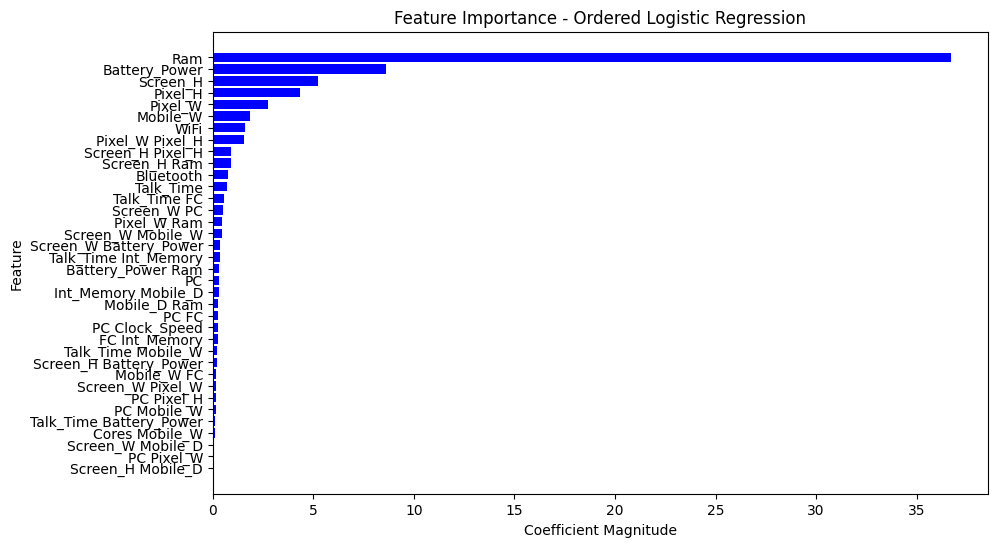

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract feature names (only for features, ignoring interaction terms if needed)
feature_names = X_train_sig.columns  # Ensure this matches the number of coefficients

# Extract coefficients from the fitted model
coefficients = res_log_sig.params  # Ordered logistic regression coefficients

# The first few values in params correspond to features, the rest are threshold parameters
num_features = len(feature_names)
coef_values = coefficients[:num_features]  # Take only the first N coefficients

# Convert coefficients to a DataFrame for sorting
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef_values})
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])

# Sort features by absolute importance
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Print top important features
print("\nTop Important Features:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'], color='blue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance - Ordered Logistic Regression')
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()


#### Observations with and without intraction in oridinal classification

    | Metric       | Without Interaction | With Interaction |
    |-------------|--------------------|------------------|
    | **Accuracy** | 95.00%             | 94.75%          |
    | **Precision** | 95.05%             | 94.77%          |
    | **Recall**   | 95.00%             | 94.75%          |
    | **F1-score** | 95.01%             | 94.74%          |


    The model without interaction terms performs slightly better in terms of accuracy and precision.
    The difference is minimal (~0.25%), suggesting that while interaction terms add more nuance, they do not significantly improve the overall classification performance


    Key Feature Differences
    
        Top Features (Without Interaction Terms)
        
            Ram (+26.14) → Most important feature but has a lower coefficient than in the interaction model.
            Battery_Power (+6.44) → Strong predictor of price.
            Pixel_W (+4.67) & Pixel_H (+3.03) → Higher resolutions increase price.
            Mobile_W (-1.28) → Heavier phones are associated with lower price categories.
            WiFi (-1.16) → Phones without WiFi tend to be cheaper.
        
        Top Features (With Interaction Terms)
        
            Ram (+36.70) → More impactful when interaction terms are included.
            Battery_Power (+8.61) → Higher impact than in the basic model.
            Screen_H (-5.20), Pixel_H (+4.36), Pixel_W (-2.73) → Similar influence but slightly different magnitudes.
            WiFi (-1.58) → Stronger negative effect than in the basic model.
            Interaction Terms (e.g., Pixel_W × Pixel_H, Screen_H × Ram, etc.) → Introduces new relationships.
        
        Key Observations:
        
            Without interaction terms, the coefficients represent the individual impact of features.
            With interaction terms, the model captures how features work together, leading to:
                A higher coefficient for RAM (+36.70 vs. +26.14)
                A slightly stronger effect for Battery Power (+8.61 vs. +6.44)
                New interactions like Screen_H × Pixel_H, Battery_Power × Ram, etc.

### Decision Tree Classifier


    Why Decision Trees Don't Need Interaction Terms?

        Unlike logistic regression, which models linear relationships between features and the target, decision trees inherently model feature interactions:
            Splitting Mechanism: Decision trees split features at different thresholds, automatically capturing complex relationships.
            Non-Linearity: They do not assume a linear relationship between features and output, making interaction terms unnecessary.


In [144]:
# Features and target
X = df.drop(columns=['Price_Range'])  # Features
y = df['Price_Range']  # Ordinal Target Variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Model
tree_model = DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred = tree_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Results
print("\nDecision Tree Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Classifier
Accuracy: 0.8700
Precision: 0.8722
Recall: 0.8700
F1-score: 0.8689

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       100
           1       0.88      0.74      0.80       100
           2       0.77      0.85      0.81       100
           3       0.92      0.92      0.92       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



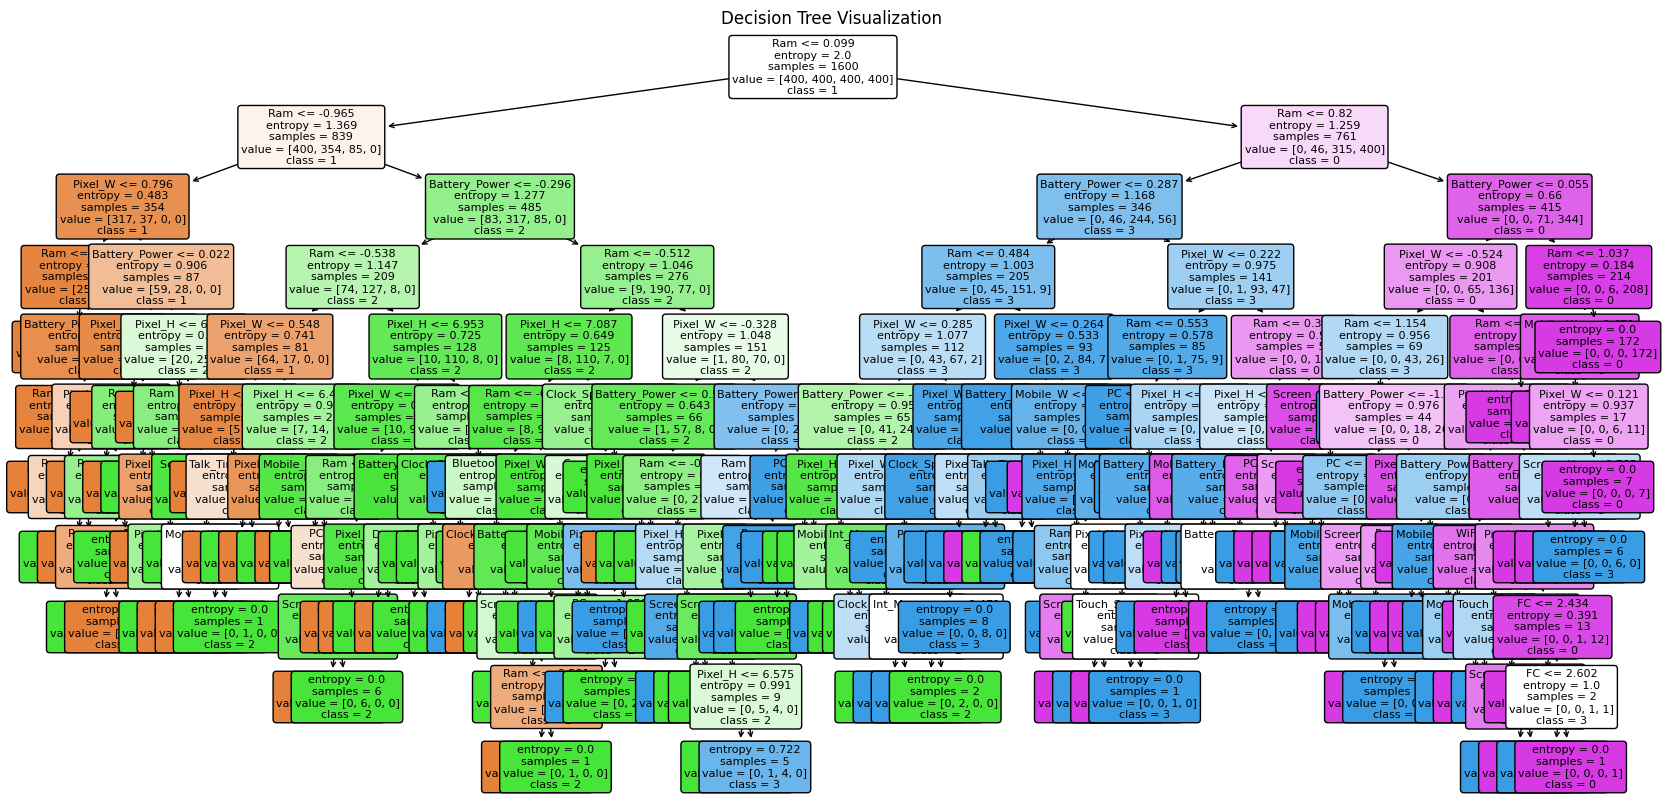

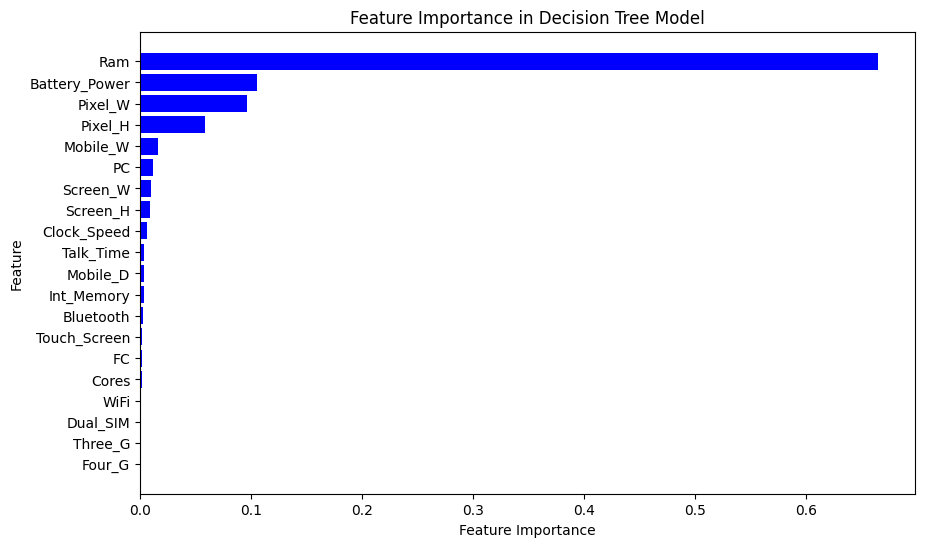


Top Important Features:
           Feature  Importance
10            Ram    0.665266
0   Battery_Power    0.105582
9         Pixel_W    0.096793
8         Pixel_H    0.058888
5        Mobile_W    0.015879
7              PC    0.012001
12       Screen_W    0.009653
11       Screen_H    0.008664
1     Clock_Speed    0.006569
13      Talk_Time    0.003881
4        Mobile_D    0.003848
3      Int_Memory    0.003218
18      Bluetooth    0.002458
16   Touch_Screen    0.001999
2              FC    0.001591
6           Cores    0.001558
19           WiFi    0.001290
17       Dual_SIM    0.000862
15        Three_G    0.000000
14         Four_G    0.000000


In [145]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(i) for i in y.unique()], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': tree_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree Model")
plt.gca().invert_yaxis()
plt.show()

# Print Top Features
print("\nTop Important Features:\n", feature_importance)


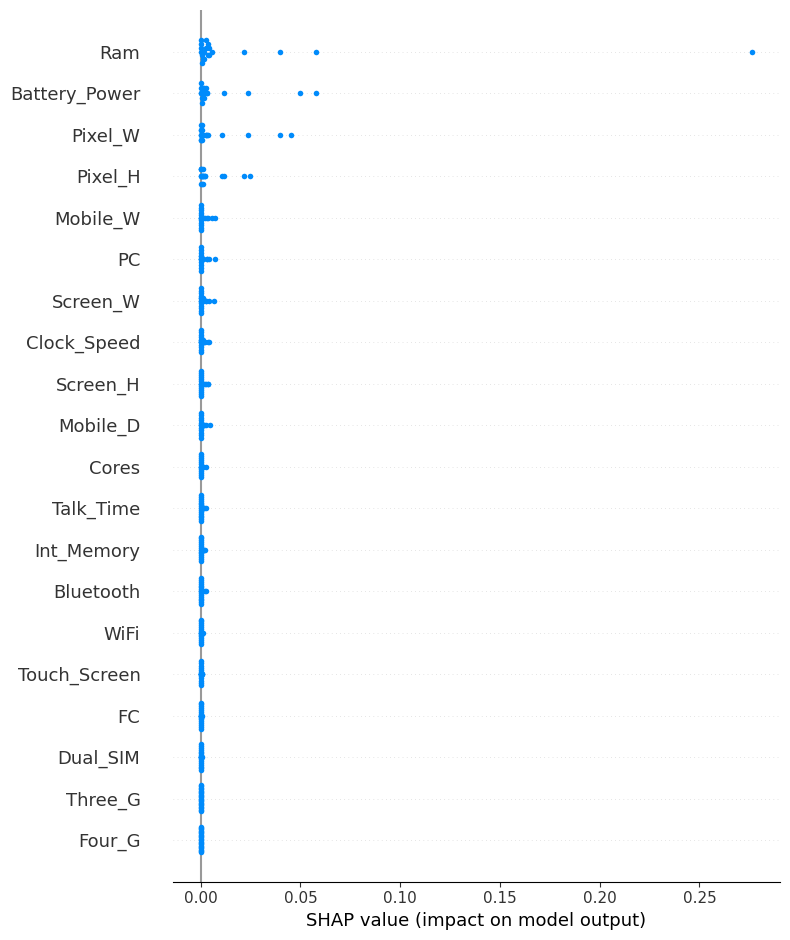

In [149]:

# Initialize SHAP Explainer
explainer = shap.TreeExplainer(tree_model)
shap_interaction_values = explainer.shap_interaction_values(X_test)

# Convert SHAP interaction values to a 2D format
shap_interaction_mean = np.abs(shap_interaction_values).mean(axis=(0, 1))  # Aggregate across samples and interactions

# SHAP Feature Names (Ensure it matches the input X_test)
feature_names = X_test.columns.tolist()

# Plot summary of interactions
shap.summary_plot(shap_interaction_mean, feature_names=feature_names)

    1. "Ram" has the highest impact on model predictions, followed by Battery_Power, Pixel_W, and Pixel_H.
    2. Features at the bottom (e.g., Four_G, Three_G, Dual_SIM, etc.) have minimal impact.
    3. "Ram" has the widest spread of SHAP values, meaning it significantly contributes to the model’s decisions.
    4. Features with a wide spread of SHAP values (e.g., Ram, Battery_Power, Pixel_W) indicate they impact different predictions differently.
    5. Features with a narrow spread (e.g., Four_G, Three_G) have low variance, meaning they do not strongly influence predictions.
    6. Features with SHAP values clustered around zero (e.g., Touch_Screen, WiFi, Bluetooth) likely do not contribute significantly to predictions.

### Randomforest Classifier

In [153]:
# Features and target
X = df.drop(columns=['Price_Range'])  # Features
y = df['Price_Range']  # Target Variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Results
print("\nRandom Forest Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Classifier
Accuracy: 0.8850
Precision: 0.8837
Recall: 0.8850
F1-score: 0.8841

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       100
           1       0.85      0.81      0.83       100
           2       0.82      0.81      0.81       100
           3       0.92      0.95      0.94       100

    accuracy                           0.89       400
   macro avg       0.88      0.89      0.88       400
weighted avg       0.88      0.89      0.88       400



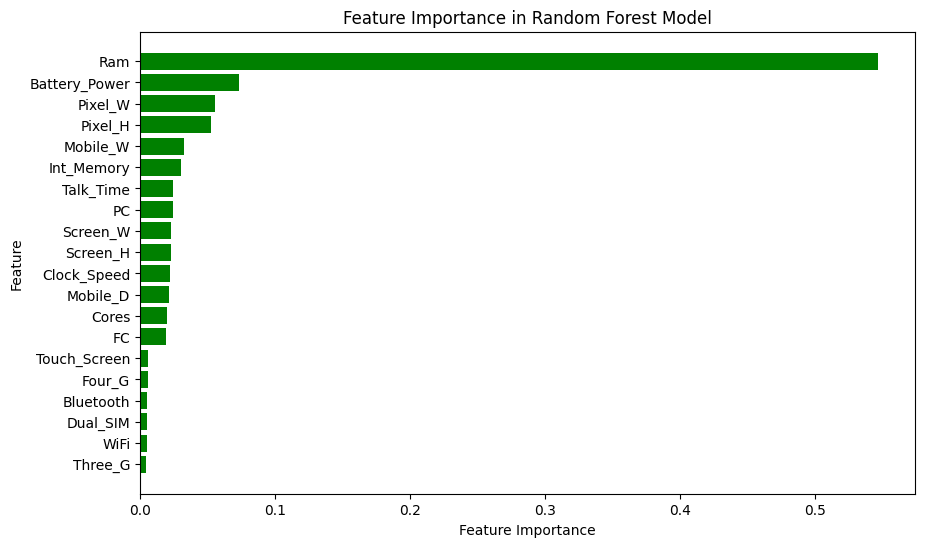


Top Important Features:
           Feature  Importance
10            Ram    0.546609
0   Battery_Power    0.073238
9         Pixel_W    0.055565
8         Pixel_H    0.052600
5        Mobile_W    0.032519
3      Int_Memory    0.030136
13      Talk_Time    0.024577
7              PC    0.024360
12       Screen_W    0.023154
11       Screen_H    0.022741
1     Clock_Speed    0.022235
4        Mobile_D    0.021404
6           Cores    0.020177
2              FC    0.019492
16   Touch_Screen    0.006160
14         Four_G    0.005923
18      Bluetooth    0.005061
17       Dual_SIM    0.004904
19           WiFi    0.004812
15        Three_G    0.004332


In [154]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='green')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

# Print Top Features
print("\nTop Important Features:\n", feature_importance)

### XGBoost

In [165]:
import xgboost as xgb

# Features and target
X = df.drop(columns=['Price_Range'])  # Features
y = df['Price_Range']  # Target Variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost Model with Interaction Constraints
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=len(y.unique()),
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Results
print("\nXGBoost Classifier with Interaction Constraints")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


XGBoost Classifier with Interaction Constraints
Accuracy: 0.9125
Precision: 0.9131
Recall: 0.9125
F1-score: 0.9126

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.89      0.89      0.89       100
           2       0.85      0.87      0.86       100
           3       0.96      0.91      0.93       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



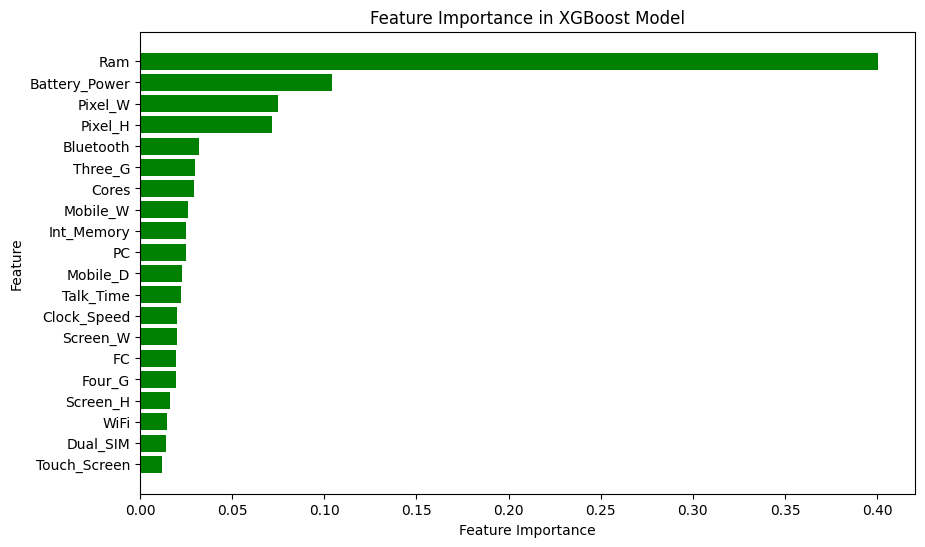


Top Important Features:
           Feature  Importance
10            Ram    0.400560
0   Battery_Power    0.103961
9         Pixel_W    0.074623
8         Pixel_H    0.071370
18      Bluetooth    0.032086
15        Three_G    0.029976
6           Cores    0.029515
5        Mobile_W    0.025874
3      Int_Memory    0.025097
7              PC    0.024718
4        Mobile_D    0.022947
13      Talk_Time    0.022321
1     Clock_Speed    0.020318
12       Screen_W    0.019803
2              FC    0.019681
14         Four_G    0.019679
11       Screen_H    0.016403
19           WiFi    0.014855
17       Dual_SIM    0.014067
16   Touch_Screen    0.012149


In [166]:

# Feature Importance for XGBoost
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
})

# Sort by Importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='green')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in XGBoost Model")
plt.gca().invert_yaxis()
plt.show()

# Print Top Features
print("\nTop Important Features:\n", feature_importance)

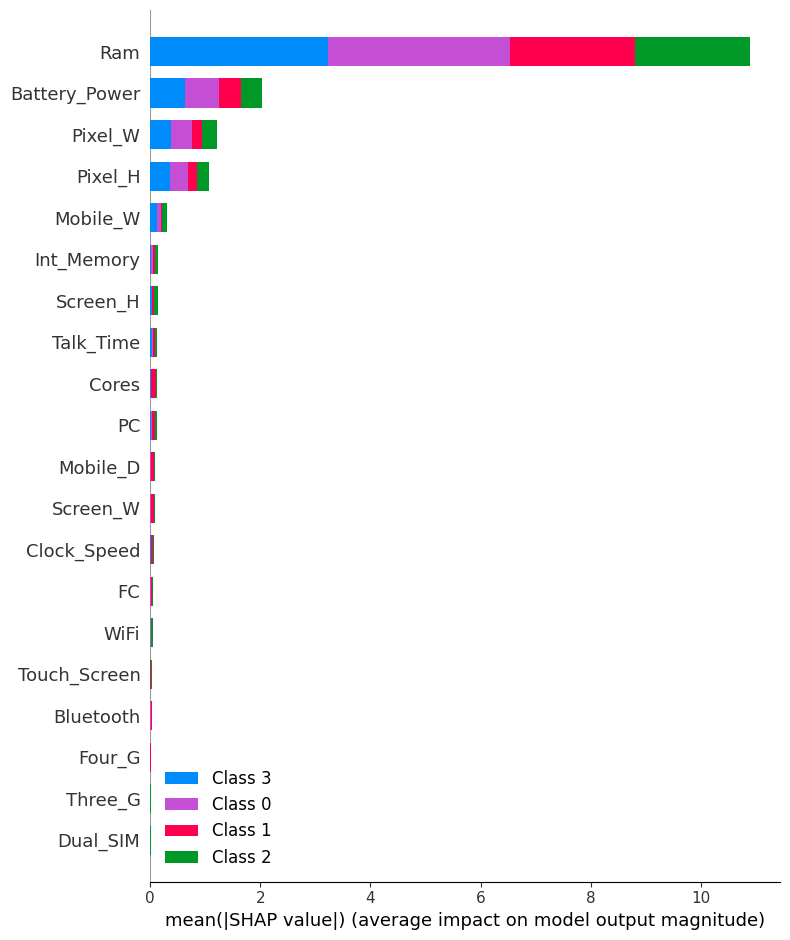

In [167]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Initialize SHAP Explainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


    1.The most influential feature is "Ram", significantly impacting the model's predictions.
    2. "Battery_Power", "Pixel_W" (Pixel Width), "Pixel_H" (Pixel Height), and "Mobile_W" (Mobile Weight) are also key contributors.
    3. Other features (e.g., Clock_Speed, Touch_Screen, WiFi) have minimal impact.

    4. The plot is color-coded by class:
            Blue → Class 3 (High-end phones)
            Purple → Class 0 (Low-end phones)
            Red → Class 1
            Green → Class 2
    Ram has a dominant blue (Class 3), meaning higher RAM is strongly associated with premium devices.

## Overall Model Performance Ranking (Based on Accuracy & F1-Score)

    Ordinal Logistic Regression (Accuracy: 0.9500, F1: 0.9501)
    Ordinal with Interaction Terms (Accuracy: 0.9475, F1: 0.9474)
    Multinomial Classification (Accuracy: 0.9275, F1: 0.9273)
    XGBoost with Interaction Constraints (Accuracy: 0.9125, F1: 0.9126)
    Random Forest (Accuracy: 0.8850, F1: 0.8841)
    Decision Tree (Accuracy: 0.8700, F1: 0.8689)



    Best Performing Model:
        Ordinal Logistic Regression (with & without interactions) performs the best, achieving the highest accuracy (~95%) and F1-score (~0.95).
        The interaction constraints in the ordinal model slightly reduce accuracy but still maintain strong performance.
        These models handle ordinal relationships well, explaining their superior performance.


    Class-Wise Performance Insights

        Class 0 (Low-end phones) is predicted most accurately across all models.
        Class 1 & Class 2 have lower recall across tree-based models, indicating misclassification between mid-tier price ranges.
        Class 3 (High-end phones) is well classified across all models


    Ordinal Logistic Regression is the best model for this problem since price ranges have an inherent order.
    
    If computational cost is a concern, Multinomial Logistic Regression is a viable option.


    Key Takeaways:

    ✅ RAM is the single most important predictor across all models.
    ✅ Battery, Screen Resolution, and Mobile Weight are the next most significant factors.
    ✅ Ram and Battery power has a dominant in Class 3, meaning higher RAM and Battery Power is strongly associated with premium devices.
    ✅ Display Resolution (Pixel_W × Pixel_H) is the most impactful interaction factor for pricing.
    ✅ Screen Size and Resolution (Screen_H × Pixel_H) have a strong combined effect.
    ✅ Screen Size and RAM (Screen_H × RAM) suggest that larger, high-end devices tend to come with more RAM.

    